<font size="8"><h1><center>Rainfall Prediction</center></h1></font>

<div style="text-align: right">
    Submitted by:<br>
    Himank Jain (18070122027)<br>
    Karan (18070122030)<br>
    Nandita Jassal (18070122040)<br>
    Riya (18070122052)
</div>

<font size="5">**Importing Libraries**</font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import joblib

<font size="5">**Reading the Data**</font>

In [4]:
df = pd.read_csv("weather.csv")

"weather.csv" dataset contains rainfall data for 49 different locations along with various sensitive parameters such as temperature, wind speed, wind direction, cloud cover etc. which could be used to predict whether it would Rain Today or not. Similar records are available for the day after. For more details, please visit the following link: <br>
<a href="https://www.kaggle.com/zaraavagyan/weathercsv" target="_blank">Click Here</a>

<font size="5">**EXPLORATORY DATA ANALYSIS**<br></font>
><font size="5">**and DATA PREPROCESSING**</font>


In [5]:
pd.set_option("display.max_columns", None)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [6]:
df.tail()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN

The above gives an idea of how the dataset looks like.<br>
First 5 and last 5 rows have been displayed!

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Here, we list details about the various columns included in the dataset.

In [8]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

The above is a summary of statistical details of the numerical values present in the dataset.

In [9]:
print(len(df.index))
df.duplicated().sum()

145460


0

There are no duplicated rows present in the dataset.

In [10]:
print(df.Location.sort_values().unique())
print(df.WindGustDir.sort_values().unique())
print(df.WindDir9am.sort_values().unique())
print(df.WindDir3pm.sort_values().unique())
print(df.RainToday.sort_values().unique())
print(df.RainTomorrow.sort_values().unique())

['Adelaide' 'Albany' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat'
 'Bendigo' 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour'
 'Dartmoor' 'Darwin' 'GoldCoast' 'Hobart' 'Katherine' 'Launceston'
 'Melbourne' 'MelbourneAirport' 'Mildura' 'Moree' 'MountGambier'
 'MountGinini' 'Newcastle' 'Nhil' 'NorahHead' 'NorfolkIsland' 'Nuriootpa'
 'PearceRAAF' 'Penrith' 'Perth' 'PerthAirport' 'Portland' 'Richmond'
 'Sale' 'SalmonGums' 'Sydney' 'SydneyAirport' 'Townsville' 'Tuggeranong'
 'Uluru' 'WaggaWagga' 'Walpole' 'Watsonia' 'Williamtown' 'Witchcliffe'
 'Wollongong' 'Woomera']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW' nan]
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW' nan]
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]


These are the unique values of the categorical data present in the dataset.<br>
This shows that there are no inconsistent data entries. This helps us understand the representation used in the dataset.

In [11]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


Here we get count of different types of variables used in the dataset. <br>
This is helpful as these variables are dealt differently in data preprocessing.  

In [12]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [13]:
print(discrete_feature)

['Cloud9am', 'Cloud3pm']


In [14]:
print(continuous_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [15]:
print(categorical_feature)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


We move a step further and classify these different variables into their domain categories to get them ready for data preprocessing in the next step.

In [16]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

The percentage of missing values present in each column has been calculated.<br>
It is worth noticing that some columns do not report any missing value while other report close to half of the record data as missing.

In [17]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

The above output displays the number of missing values for each column.

In [18]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [19]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

<u>randomsampleimputation</u> function takes a variable as input along with the dataframe and imputes the missing values of the variable with the help of random sampling.<br>
In this technique, a sample is chosen randomly from the already filled in values of the same variable. Choosing such a sample is done in an unbiased way.<br>
Here, random sampling is done for the variables - "Cloud9am", "Cloud3pm", "Evaporation" and "Sunshine".

In [20]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          2.4   
1       2008-12-02   Albury      7.4     25.1       0.0          3.6   
2       2008-12-03   Albury     12.9     25.7       0.0          2.6   
3       2008-12-04   Albury      9.2     28.0       0.0         18.4   
4       2008-12-05   Albury     17.5     32.3       1.0          5.4   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          1.4   
145456  2017-06-22    Uluru      3.6     25.3       0.0          7.6   
145457  2017-06-23    Uluru      5.4     26.9       0.0          6.8   
145458  2017-06-24    Uluru      7.8     27.0       0.0          2.6   
145459  2017-06-25    Uluru     14.9      NaN       0.0          1.4   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            8.3           W           44.0          W        WNW   
1           10.0         WNW           44.0        NNW        WSW   
2            4.4         WSW           46.0          W        WSW   
3            8.9          NE           24.0         SE          E   
4            3.0           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       7.8           E           31.0         SE        ENE   
145456      13.5         NNW           22.0         SE          N   
145457      11.0           N           37.0         SE        WNW   
145458      13.2          SE           28.0        SSE          N   
145459       0.7         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       0.0     16.9     21.8        No   
1            1007.8       7.0       1.0     17.2     24.3        No   
2            1008.7       8.0       2.0     21.0     23.2        No   
3            1012.8       0.0       5.0     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       1.0       1.0     10.1     22.4        No   
145456       1019.1       8.0       5.0     10.9     24.5        No   
145457       1016.8       8.0       1.0     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

This is the updated dataset after performing random sampling on the above mentioned columns.

In [21]:
corrmat = df.corr()
corrmat

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.264243  0.034965   
MaxTemp        0.736555  1.000000 -0.074992     0.330018  0.234574   
Rainfall       0.103938 -0.074992  1.000000    -0.028819 -0.126713   
Evaporation    0.264243  0.330018 -0.028819     1.000000  0.152067   
Sunshine       0.034965  0.234574 -0.126713     0.152067  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.115676 -0.019548   
WindSpeed9am   0.175064  0.014450  0.087338     0.108256  0.002740   
WindSpeed3pm   0.175173  0.050300  0.057887     0.071081  0.024379   
Humidity9am   -0.232899 -0.504110  0.224405    -0.284180 -0.251279   
Humidity3pm    0.006089 -0.508855  0.255755    -0.219553 -0.322692   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.170029  0.025139   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.185339 -0.010022   
Cloud9am       0.049552 -0.175388  0.134936    -0.085556 -0.299892   
Cloud3pm       0.014919 -0.162153  0.112153    -0.083914 -0.309680   
Temp9am        0.901821  0.887210  0.011192     0.311943  0.147188   
Temp3pm        0.708906  0.984503 -0.079657     0.322375  0.249469   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.115676      0.108256      0.071081    -0.284180   
Sunshine           -0.019548      0.002740      0.024379    -0.251279   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.044177      0.014133      0.035089     0.277955   
Cloud3pm            0.063227      0.032828      0.013988     0.211440   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.049552  0.014919   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.175388 -0.162153   
Rainfall          0.255755    -0.168154    -0.126534  0.134936  0.112153   
Evaporation      -0.219553    -0.170029    -0.185339 -0.085556 -0.083914   
Sunshine         -0.322692     0.025139    -0.010022 -0.299892 -0.309680   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.044177  0.063227   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.014133  0.032828   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.035089  0.013988   
Humidity9am       0.666949     0.139442     0.186858  0.277955  0.211440   
Humidity3pm       1.000000    -0.027544     0.051997  0.316882  0.317951   
Pressure9am      -0.027544     1.000000     0.961326 -0.084203 -0.092562   
Pressure3pm       0.051997     0.961326     1.000000 -0.039833 -0.052994   
Cloud9am          0.316882    -0.084203    -0.039833  1.000000  0.336379   
Cloud3pm          0.317951    -0.092562    -0.052994  0.336379  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.084257 -0.075221   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.182370 -0.191017   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall       0.011192 -0.079657  
Evaporation    0.311943  0.322375  
Sunshine       0.147188  0.249469  
WindGustSpeed  0.150150  0.032748  
WindSpeed9am   0.128545  0.004569  
Wi

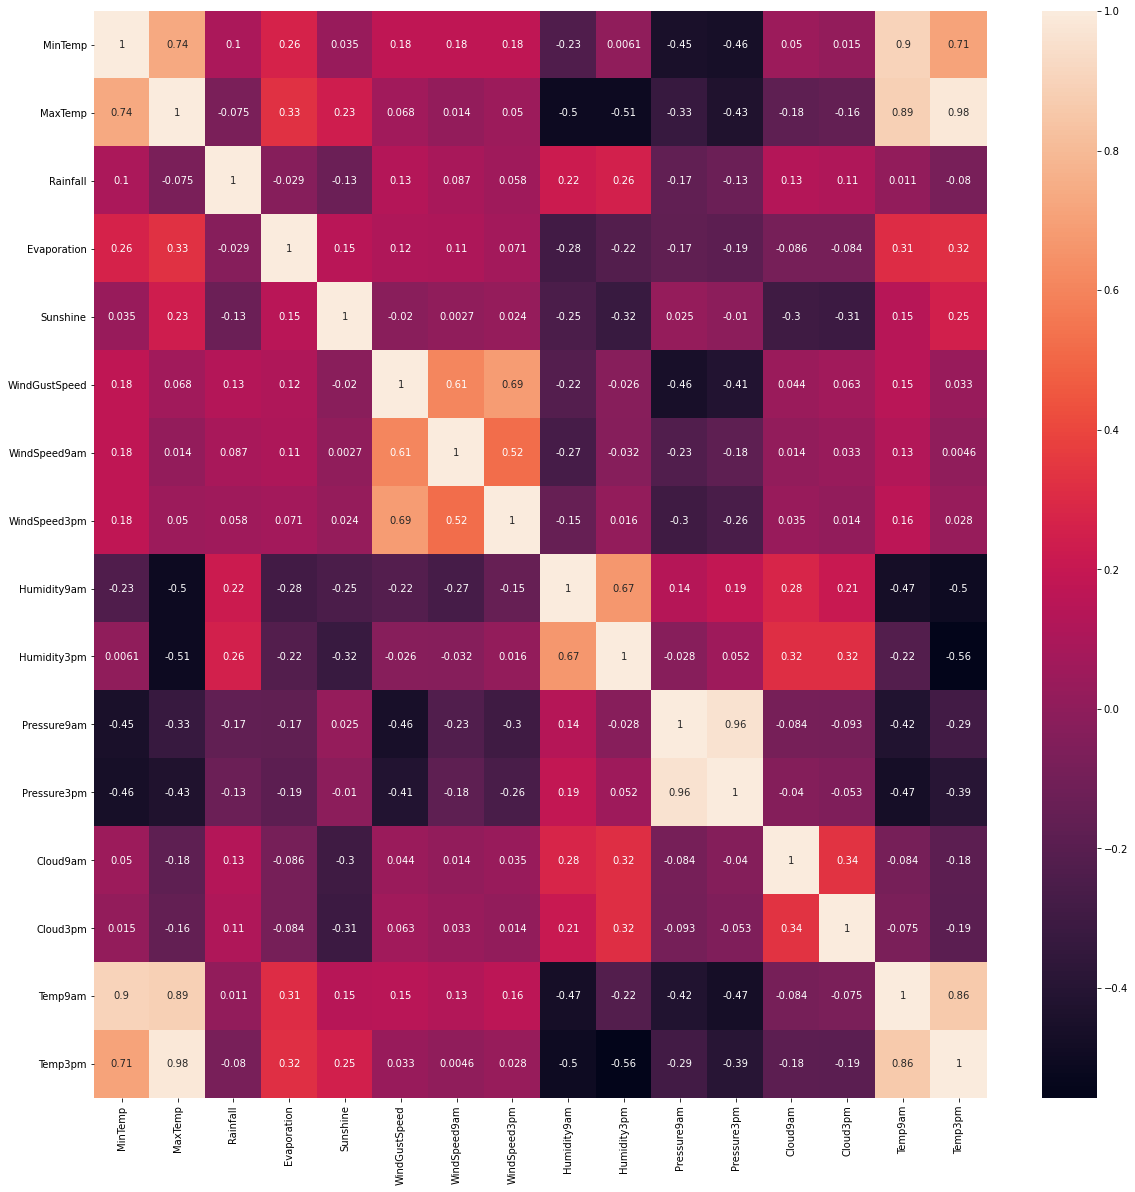

In [22]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

The above output displays correlation matrix showing correlation coefficients between each of the numerical variables present in the dataset.<br>
These correlation coefficients convey the strength of the relationship between respective variables.<br>
The above heatmap magnitude of correlation between the variables using a perceptually uniform color scale.<br>
Darker the color, more negative is the value and vice versa.

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


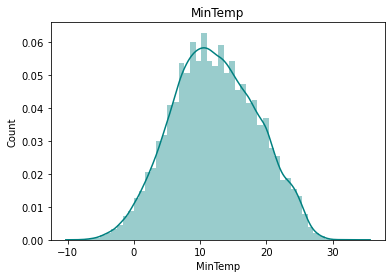

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


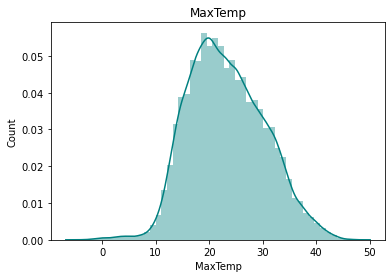

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


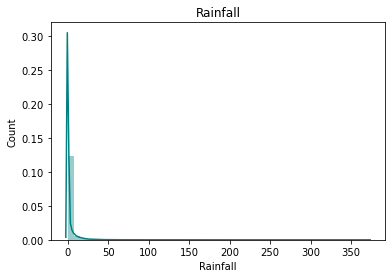

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


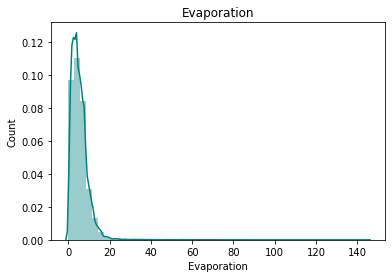

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


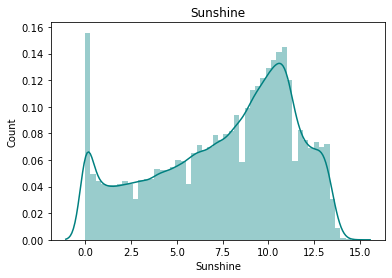

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


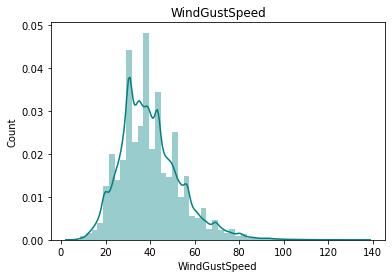

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


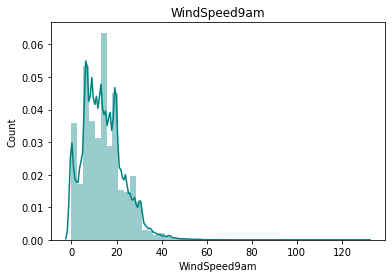

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


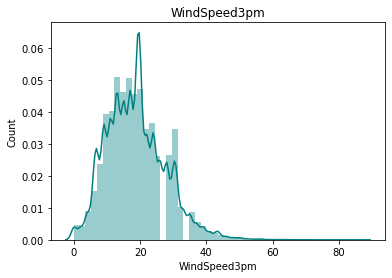

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


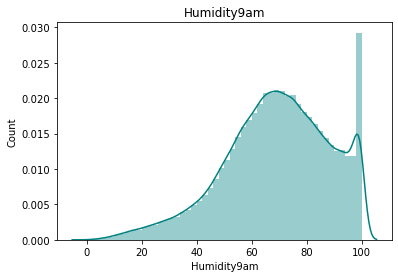

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


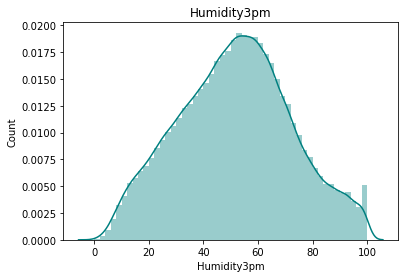

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


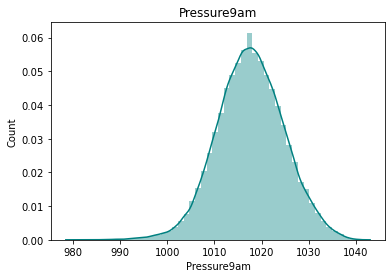

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


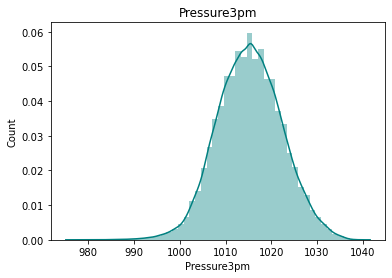

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


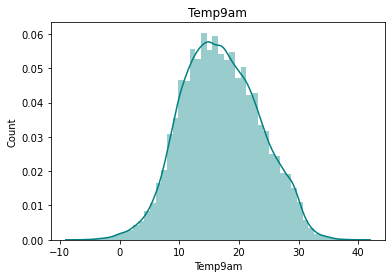

<Figure size 1080x1080 with 0 Axes>

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


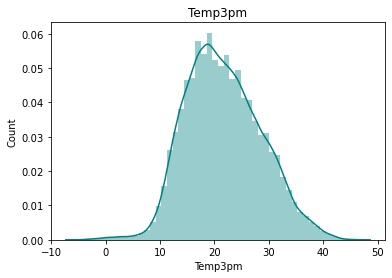

<Figure size 1080x1080 with 0 Axes>

In [23]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature],color='teal')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

The above charts are plotted to get information about each continuous feature present in the dataset.<br>
The charts make use of distplot function which helps in determining the number of values with a particular value present in the column by plotting a histogram. The line drawn over this histogram aids in visualization of the univariate distribution of data in the given column.

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\python38\lib\site-packages\seaborn\_dec

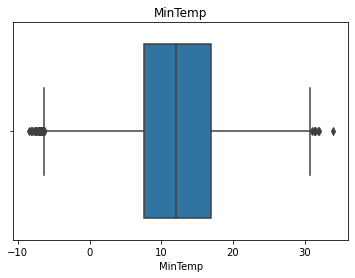

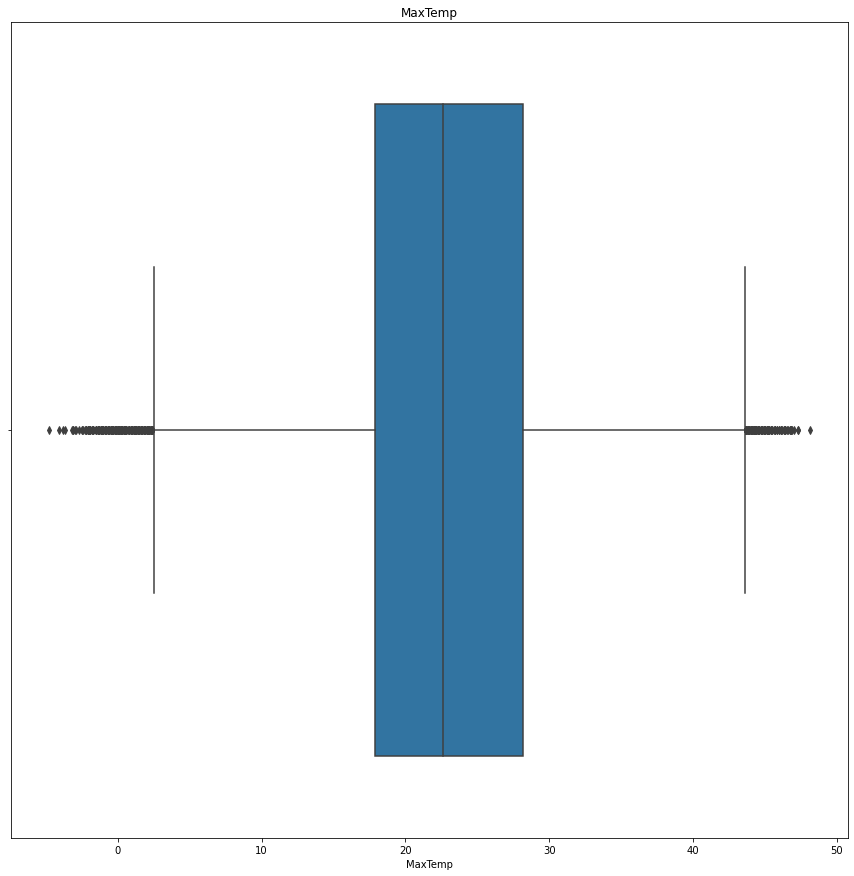

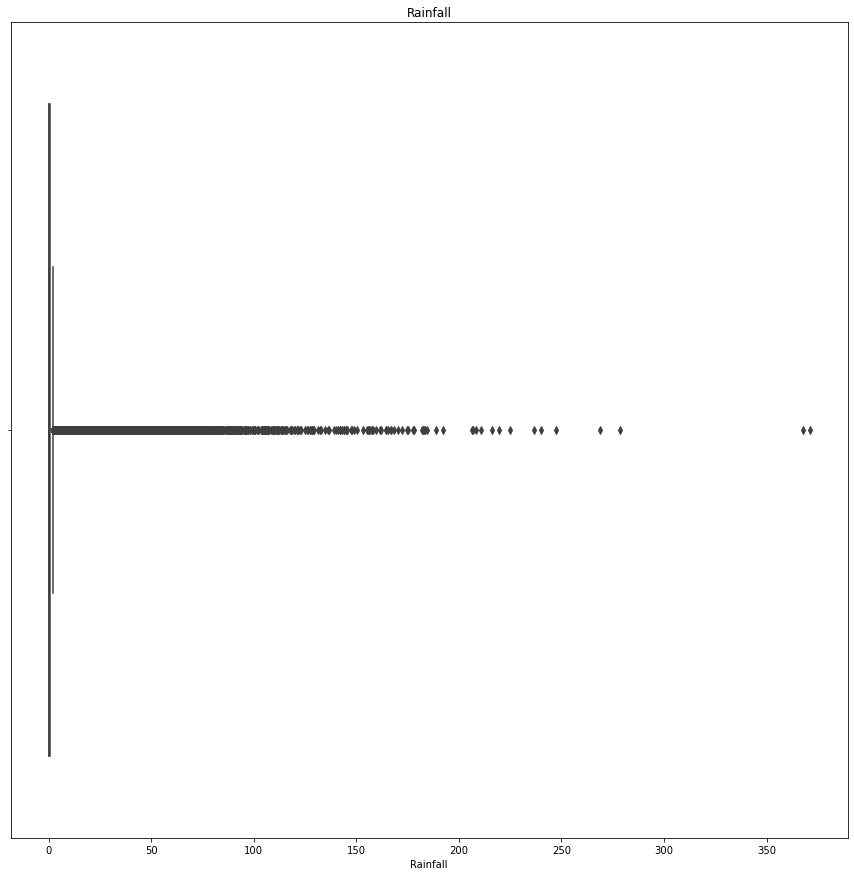

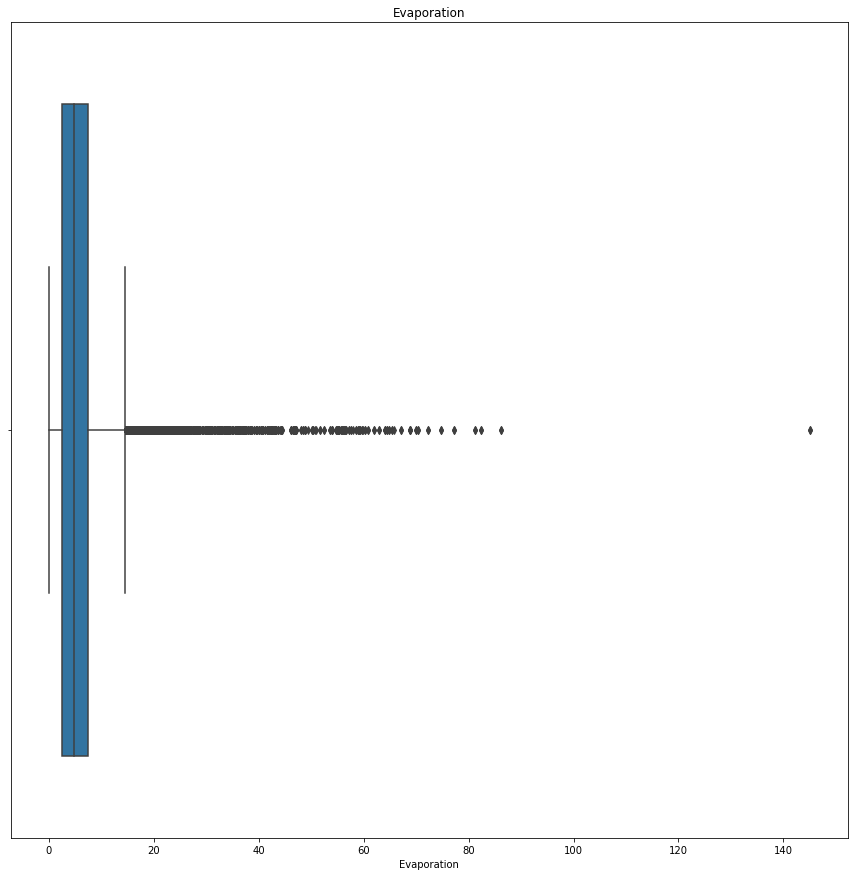

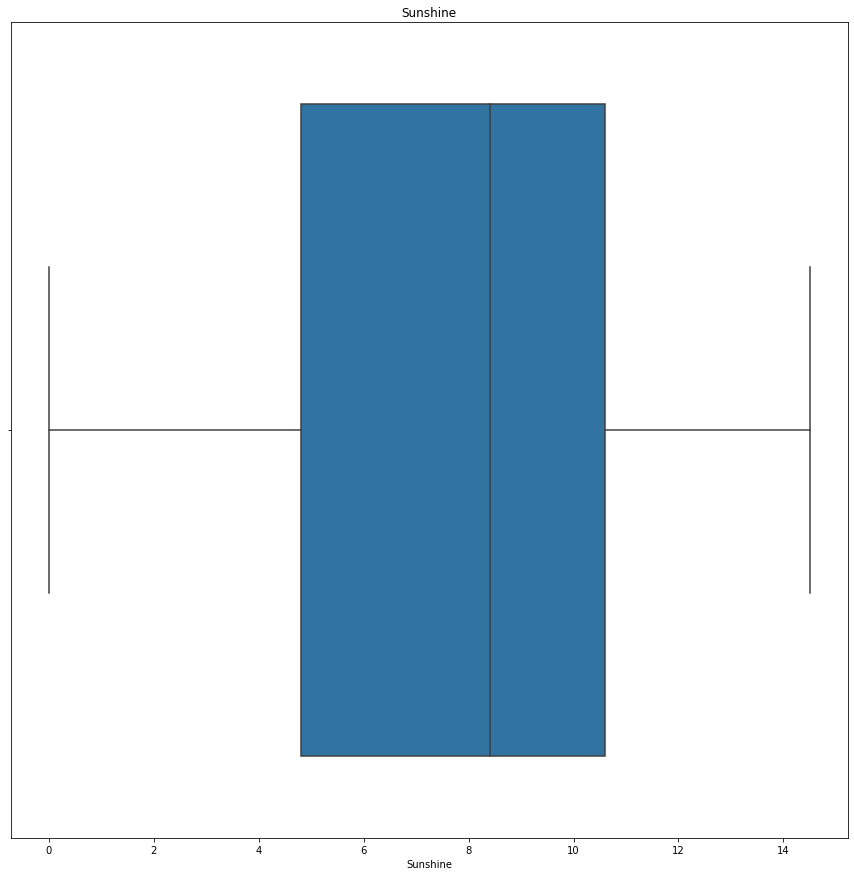

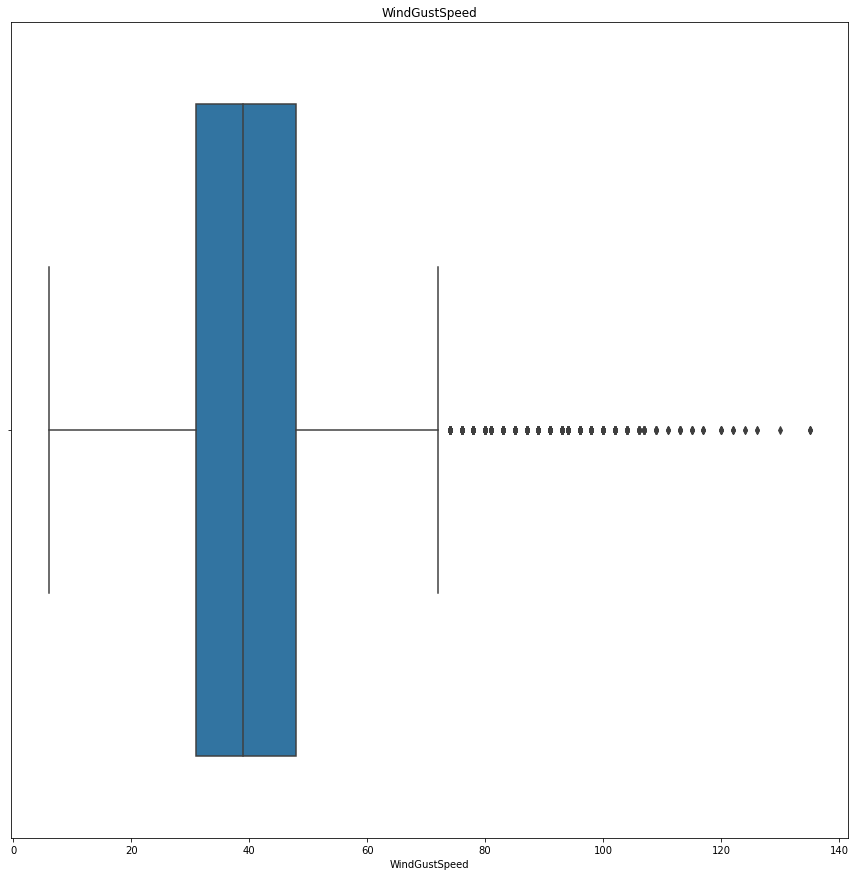

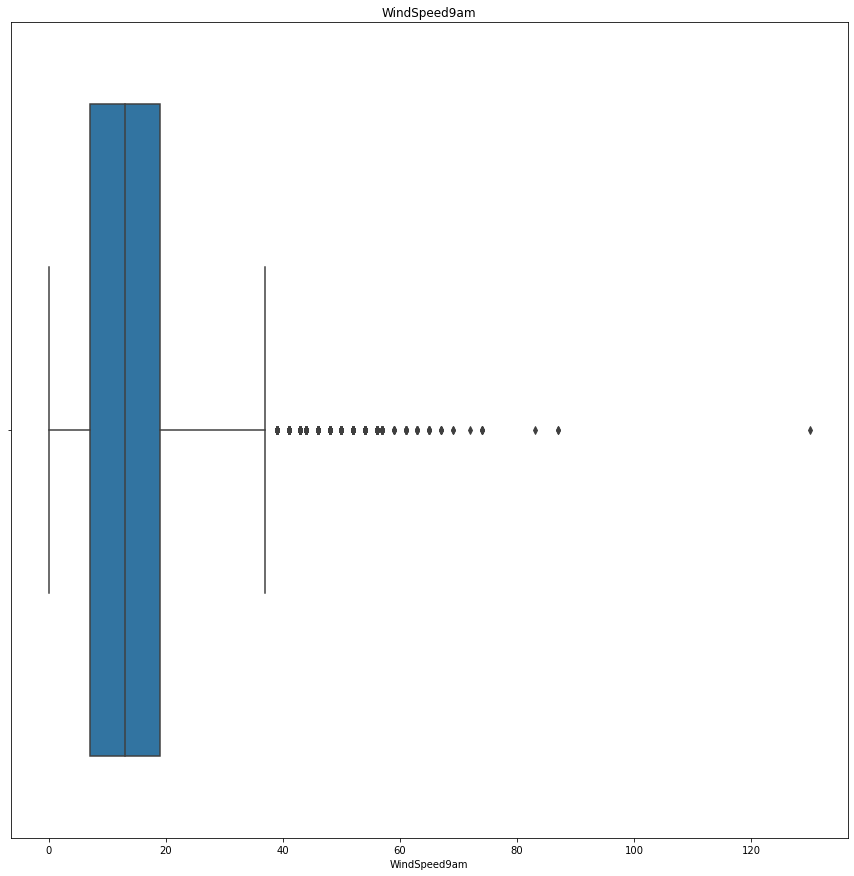

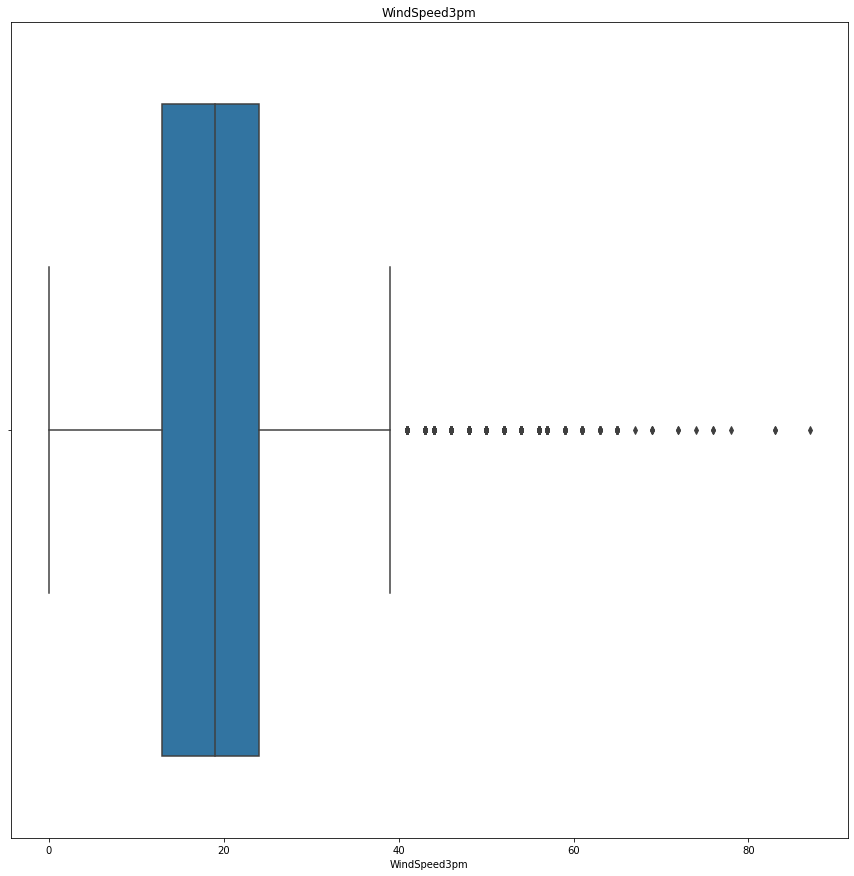

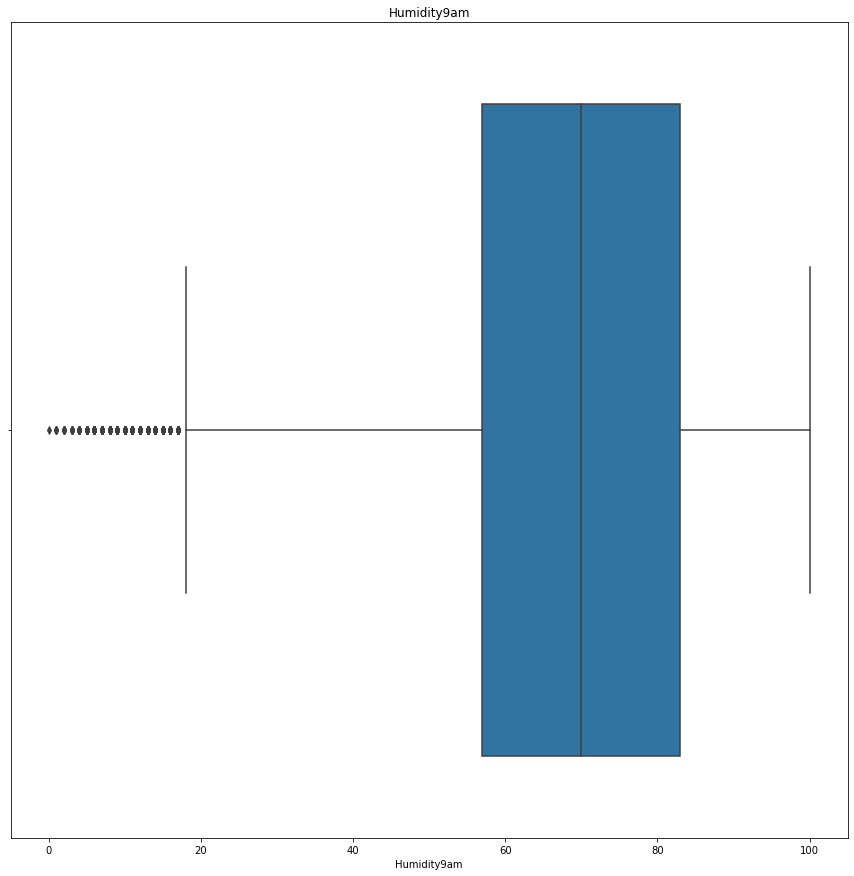

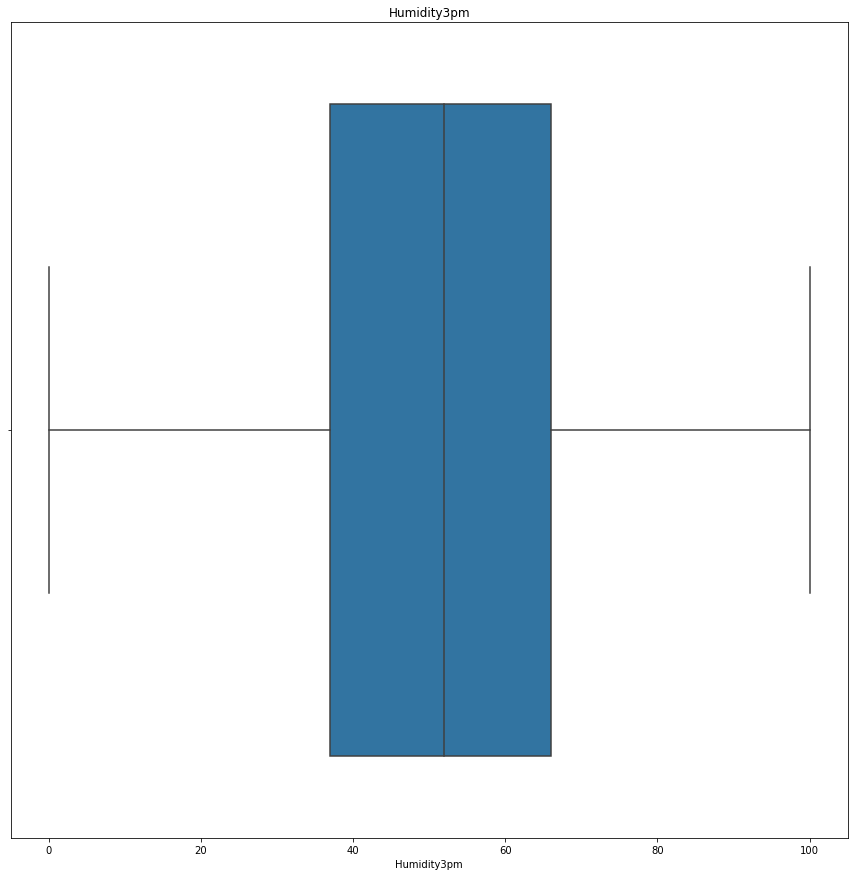

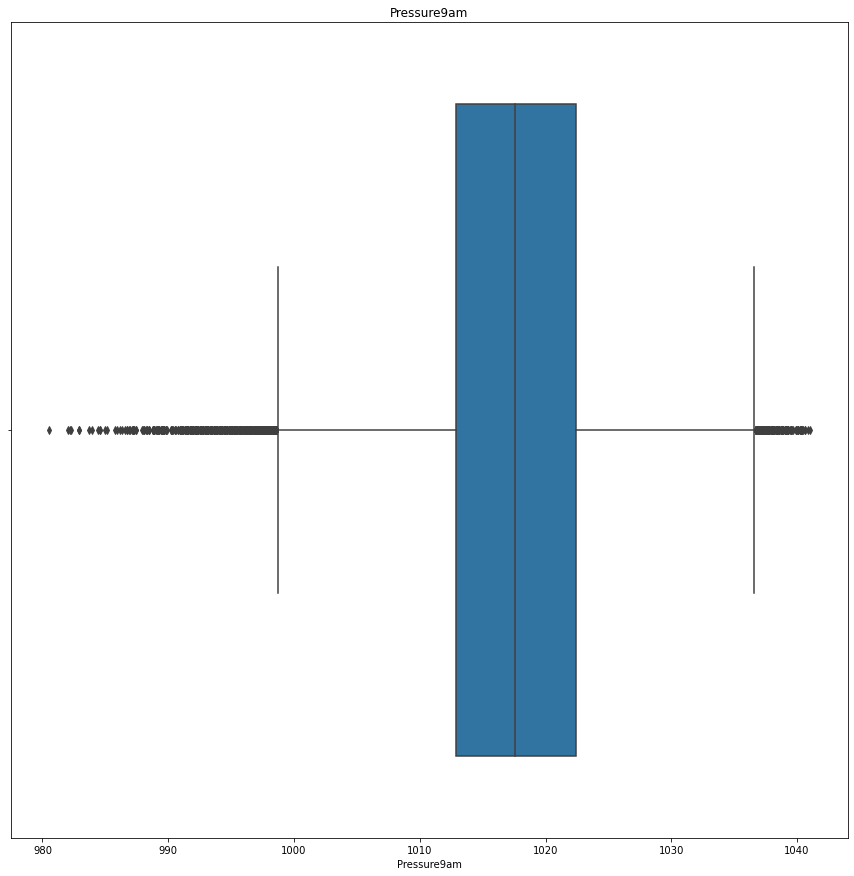

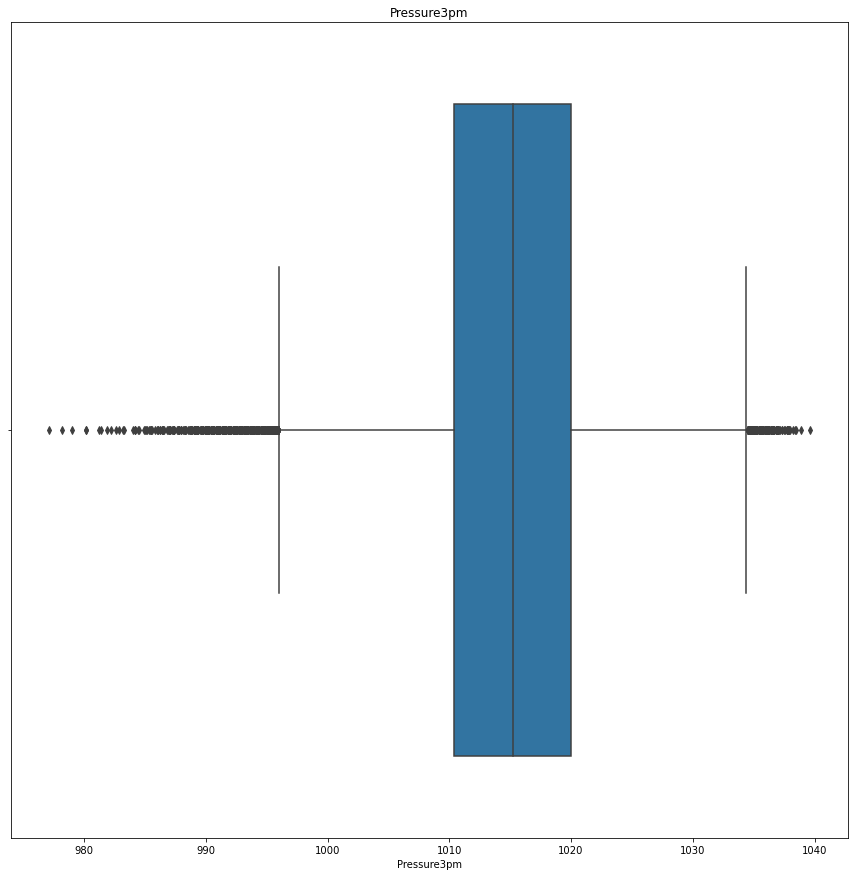

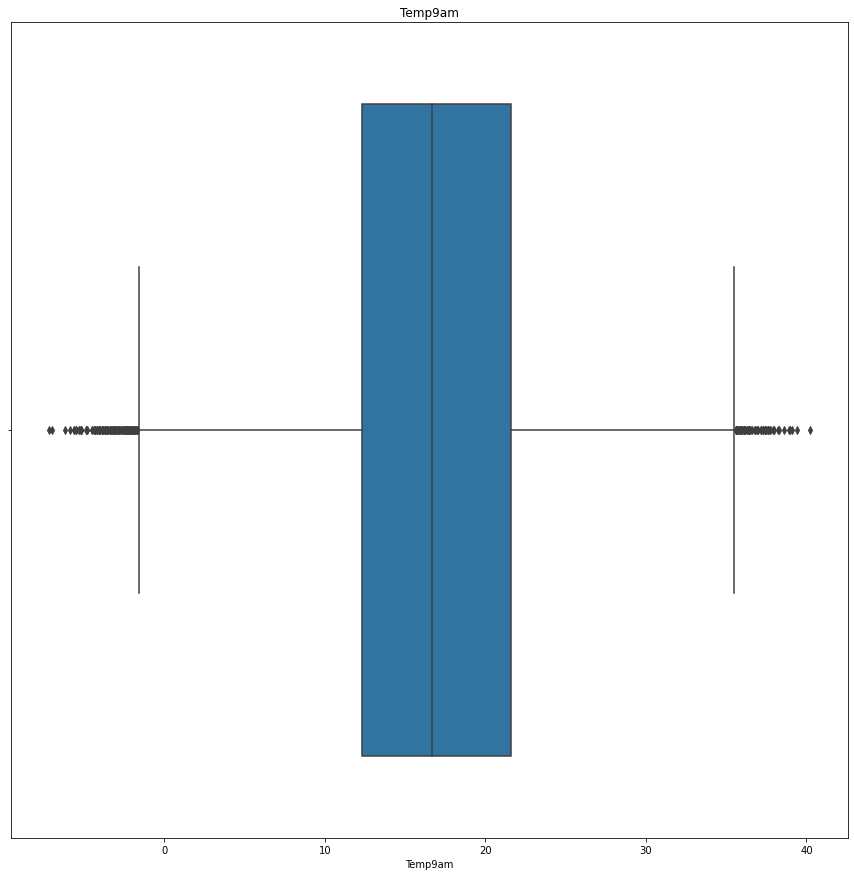

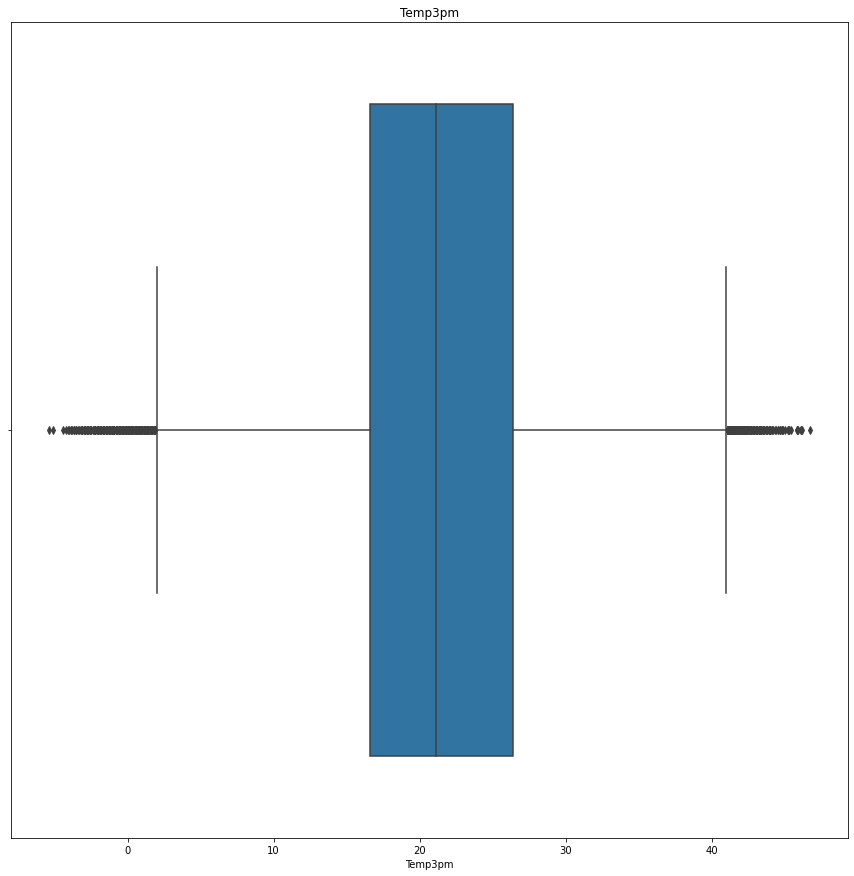

<Figure size 1080x1080 with 0 Axes>

In [24]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

Before attempting to remove the outliers, these box plots have been plotted as they provide handy information of the outliers in a particular data subset.<br>
Box plot marks five numerical data points:  Minimum, First quartile, Median, Third quartile, Maximum. The minimum point (q1 - (1.5 \* IQR)) and maximum point (q3 + (1.5 \* IQR)) are the points beyond wich outliers are present.<br>
The above charts inform about the presence of outliers in a particular column along with the extent to which they outlie beyond the minimum and maximum point. 

In [25]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

Every missing value for the continuous features has been replaced by the median of the current present values.

In [26]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

Above is the percentage of remaining missing values which are to be treated further.

In [27]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

<u>mode_nan</u> is a function which takes a column variable along with its dataframe as input to replace the missing values in the column with the mode of current present values in the same column.<br>
Missing values of Cloud9am and Cloud3pm hence get replaced with the mode of the present values in respective columns.

In [29]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)

Creating dummy variables while deleting the original reference for the columns: RainToday and RainTomorrow.


In [30]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          2.4   
1       2008-12-02   Albury      7.4     25.1       0.0          3.6   
2       2008-12-03   Albury     12.9     25.7       0.0          2.6   
3       2008-12-04   Albury      9.2     28.0       0.0         18.4   
4       2008-12-05   Albury     17.5     32.3       1.0          5.4   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          1.4   
145456  2017-06-22    Uluru      3.6     25.3       0.0          7.6   
145457  2017-06-23    Uluru      5.4     26.9       0.0          6.8   
145458  2017-06-24    Uluru      7.8     27.0       0.0          2.6   
145459  2017-06-25    Uluru     14.9     22.6       0.0          1.4   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            8.3           W           44.0          W        WNW   
1           10.0         WNW           44.0        NNW        WSW   
2            4.4         WSW           46.0          W        WSW   
3            8.9          NE           24.0         SE          E   
4            3.0           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       7.8           E           31.0         SE        ENE   
145456      13.5         NNW           22.0         SE          N   
145457      11.0           N           37.0         SE        WNW   
145458      13.2          SE           28.0        SSE          N   
145459       0.7         NaN           39.0        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       0.0     16.9     21.8          0   
1            1007.8       7.0       1.0     17.2     24.3          0   
2            1008.7       8.0       2.0     21.0     23.2          0   
3            1012.8       0.0       5.0     18.1     26.5          0   
4            1006.0       7.0       8.0     17.8     29.7          0   
...             ...       ...       ...      ...      ...        ...   
145455       1020.3       1.0       1.0     10.1     22.4          0   
145456       1019.1       8.0       5.0     10.9     24.5          0   
145457       1016.8       8.0       1.0     12.5     26.1          0   
145458       1016.5       3.0       2.0     15.1     26.0          0   
145459       1017.9       8.0       8.0     15.0     20.9          0   

        RainTomorrow  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
145455             0  
145456             0  
145457             0  
145458             0  
145459             0  

[145460 rows x 23 columns]

In [31]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In the three categorical columns WindGustDir, WindDir9am and WindDir9pm, each of the unique value in the column is mapped to a number.<br> These numbers range from 0 to no_of_unique_values-1.

In [32]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [33]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

All the missing values have been treated.

In [34]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [35]:
df1

RainTomorrow         0     1
Location                    
Adelaide          2505   688
Albany            2138   902
Albury            2422   618
AliceSprings      2796   244
BadgerysCreek     2426   583
Ballarat          2259   781
Bendigo           2478   562
Brisbane          2484   709
Cairns            2090   950
Canberra          2807   629
Cobar             2623   386
CoffsHarbour      2140   869
Dartmoor          2087   922
Darwin            2341   852
GoldCoast         2265   775
Hobart            2432   761
Katherine         1313   265
Launceston        2341   699
Melbourne         2557   636
MelbourneAirport  2356   653
Mildura           2682   327
Moree             2615   394
MountGambier      2120   920
MountGinini       2221   819
Newcastle         2308   731
Nhil              1336   242
NorahHead         2196   808
NorfolkIsland     2090   919
Nuriootpa         2417   592
PearceRAAF        2504   505
Penrith           2444   595
Perth             2548   645
PerthAirport      2442   567
Portland          1914  1095
Richmond          2449   560
Sale              2366   643
SalmonGums        2529   472
Sydney            2479   865
SydneyAirport     2235   774
Townsville        2521   519
Tuggeranong       2471   568
Uluru             1462   116
WaggaWagga        2473   536
Walpole           2057   949
Watsonia          2271   738
Williamtown       2309   700
Witchcliffe       2130   879
Wollongong        2327   713
Woomera           2807   202

The above results display the number of results whether it will RainTomorrow location wise.<br>1 indicates Yes (It will rain tomorrow) while 0 indicates No (It won't rain tomorrow).

In [36]:
df1[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

The above result displays number of records that hold the result that it will rain tomorrow for each location.

In [37]:
len(df1[1].sort_values(ascending = False).index)

49

The length of datafram df1 is displayed.<br>As it contains record for each location. The result comes out to be the number of locations in the dataset.

In [38]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

Each of the 49 locations have been mapped to an integer for further convenience.<br>
These numbers range from 1 to 49.

In [39]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

Two additional columns are created for the dataset which contain the day and month to which the record belongs.<br>These values are stored in the column "Date_month" and "Date_day" respectively.

In [40]:
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01        30     13.4     22.9       0.6          2.4   
1      2008-12-02        30      7.4     25.1       0.0          3.6   
2      2008-12-03        30     12.9     25.7       0.0          2.6   
3      2008-12-04        30      9.2     28.0       0.0         18.4   
4      2008-12-05        30     17.5     32.3       1.0          5.4   
...           ...       ...      ...      ...       ...          ...   
145455 2017-06-21        49      2.8     23.4       0.0          1.4   
145456 2017-06-22        49      3.6     25.3       0.0          7.6   
145457 2017-06-23        49      5.4     26.9       0.0          6.8   
145458 2017-06-24        49      7.8     27.0       0.0          2.6   
145459 2017-06-25        49     14.9     22.6       0.0          1.4   

        Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0            8.3          4.0           44.0         5.0         3.0   
1           10.0          2.0           44.0         0.0         6.0   
2            4.4          5.0           46.0         5.0         6.0   
3            8.9         11.0           24.0        13.0        14.0   
4            3.0          4.0           41.0        12.0         0.0   
...          ...          ...            ...         ...         ...   
145455       7.8         15.0           31.0        13.0        13.0   
145456      13.5          0.0           22.0        13.0         2.0   
145457      11.0          3.0           37.0        13.0         3.0   
145458      13.2         12.0           28.0        11.0         2.0   
145459       0.7          4.0           39.0        14.0        15.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       0.0     16.9     21.8          0   
1            1007.8       7.0       1.0     17.2     24.3          0   
2            1008.7       8.0       2.0     21.0     23.2          0   
3            1012.8       0.0       5.0     18.1     26.5          0   
4            1006.0       7.0       8.0     17.8     29.7          0   
...             ...       ...       ...      ...      ...        ...   
145455       1020.3       1.0       1.0     10.1     22.4          0   
145456       1019.1       8.0       5.0     10.9     24.5          0   
145457       1016.8       8.0       1.0     12.5     26.1          0   
145458       1016.5       3.0       2.0     15.1     26.0          0   
145459       1017.9       8.0       8.0     15.0     20.9          0   

        RainTomorrow  Date_month  Date_day  
0                  0          12         1  
1                  0          12         2  
2                  0          12         3  
3                  0          12         4  
4                  0          12         5  
...              ...         ...       ...  
145455             0           6        21  
145456             0           6        22  
145457             0           6        23  
145458             0           6        24 

The outcome of the snippet is the updated dataframe after making all of the above changes.

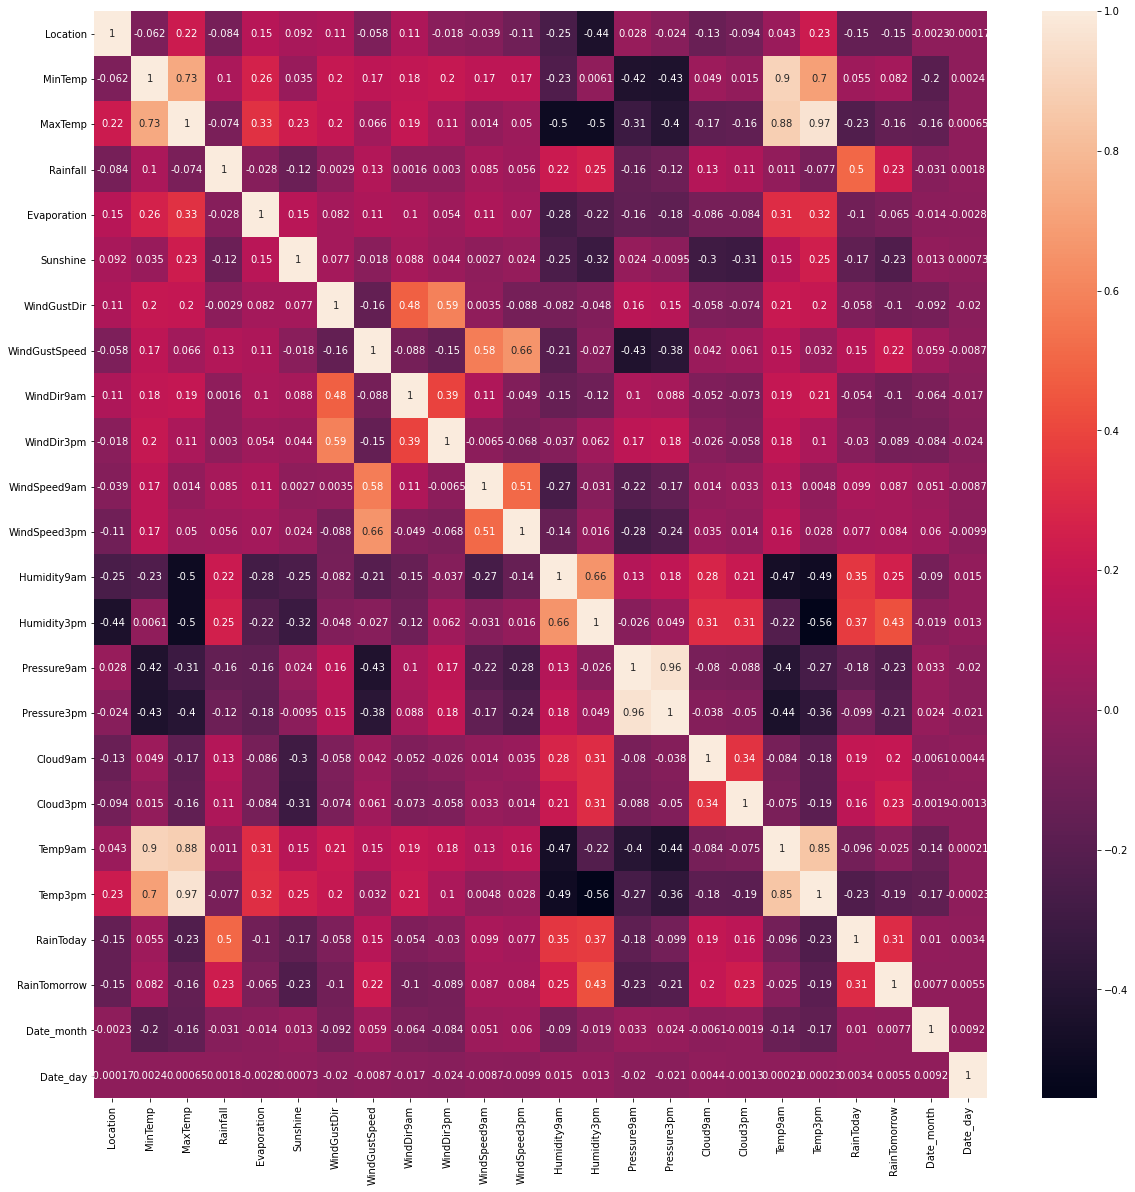

In [41]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

Here is the correlation heat map of the updated dataframe.<br>Darker the color, more negative is the correlation between corresponding columns and vice versa.

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


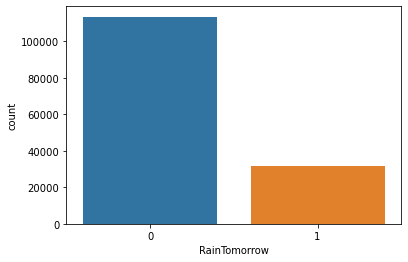

In [42]:
sns.countplot(df["RainTomorrow"])

The above plot simply plots the count of the record "RainTomorrow". 0 signifies that it won't rain tomorrow while 1 signifies it will rain tomorrow.<br>
It is worth noting that the number of records that predict it will rain tomorrow are very less. Hence, inorder for our prediction to be accurate we need to balance our dataset.<br>
To improve the accuracy of prediction, the number of records that hold the value 1 should be close to the number of records that hold the value 0.

In [43]:
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01        30     13.4     22.9       0.6          2.4   
1      2008-12-02        30      7.4     25.1       0.0          3.6   
2      2008-12-03        30     12.9     25.7       0.0          2.6   
3      2008-12-04        30      9.2     28.0       0.0         18.4   
4      2008-12-05        30     17.5     32.3       1.0          5.4   
...           ...       ...      ...      ...       ...          ...   
145455 2017-06-21        49      2.8     23.4       0.0          1.4   
145456 2017-06-22        49      3.6     25.3       0.0          7.6   
145457 2017-06-23        49      5.4     26.9       0.0          6.8   
145458 2017-06-24        49      7.8     27.0       0.0          2.6   
145459 2017-06-25        49     14.9     22.6       0.0          1.4   

        Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0            8.3          4.0           44.0         5.0         3.0   
1           10.0          2.0           44.0         0.0         6.0   
2            4.4          5.0           46.0         5.0         6.0   
3            8.9         11.0           24.0        13.0        14.0   
4            3.0          4.0           41.0        12.0         0.0   
...          ...          ...            ...         ...         ...   
145455       7.8         15.0           31.0        13.0        13.0   
145456      13.5          0.0           22.0        13.0         2.0   
145457      11.0          3.0           37.0        13.0         3.0   
145458      13.2         12.0           28.0        11.0         2.0   
145459       0.7          4.0           39.0        14.0        15.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       0.0     16.9     21.8          0   
1            1007.8       7.0       1.0     17.2     24.3          0   
2            1008.7       8.0       2.0     21.0     23.2          0   
3            1012.8       0.0       5.0     18.1     26.5          0   
4            1006.0       7.0       8.0     17.8     29.7          0   
...             ...       ...       ...      ...      ...        ...   
145455       1020.3       1.0       1.0     10.1     22.4          0   
145456       1019.1       8.0       5.0     10.9     24.5          0   
145457       1016.8       8.0       1.0     12.5     26.1          0   
145458       1016.5       3.0       2.0     15.1     26.0          0   
145459       1017.9       8.0       8.0     15.0     20.9          0   

        RainTomorrow  Date_month  Date_day  
0                  0          12         1  
1                  0          12         2  
2                  0          12         3  
3                  0          12         4  
4                  0          12         5  
...              ...         ...       ...  
145455             0           6        21  
145456             0           6        22  
145457             0           6        23  
145458             0           6        24 

In [44]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.950000000000002 30.450000000000003


In [45]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [46]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.700000000000001 43.5


In [47]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [48]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.8999999999999999 1.5


In [49]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [50]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.600000000000001 14.600000000000001


In [51]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [52]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [53]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [54]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [55]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [56]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [57]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [58]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [59]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [60]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [61]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [62]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.6500000000001 1031.85


In [63]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [64]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [65]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [66]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999993 40.45


In [67]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

As seen in one of the previous plotted graphs, the dataset contains many outliers which would withhold the accuracy of the prediction. In order to improve the accuracy, these outliers need to be treated. <br>
<u>upper_bridge</u> and <u>lower_bridge</u> are calculated. For each of the above variables, these values contain what we refer to the maximum and minimum point in the box plot. As indicated by the name, they mark the minimum value and maximum value which further define the range in which the values are to be present for the variable. <br>
Consequently, we calculate upper_bridge and lower_bridge for each of the variables. All the outliers beyond the maximum point are reassigned the value contained in upper_bridge while those lying beyond minimum point are assigned the value of lower_bridge.

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python\python38\lib\site-packages\seaborn\_dec

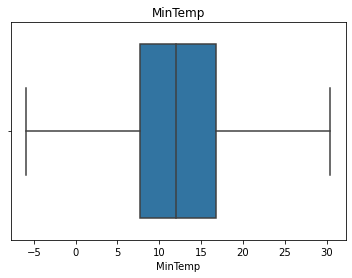

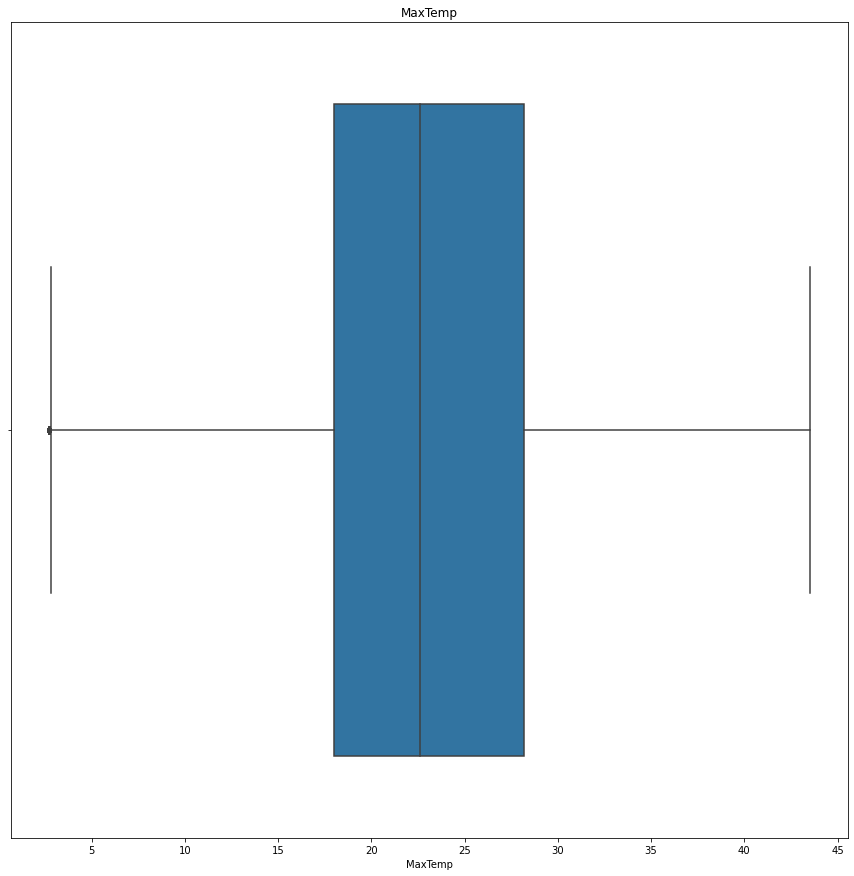

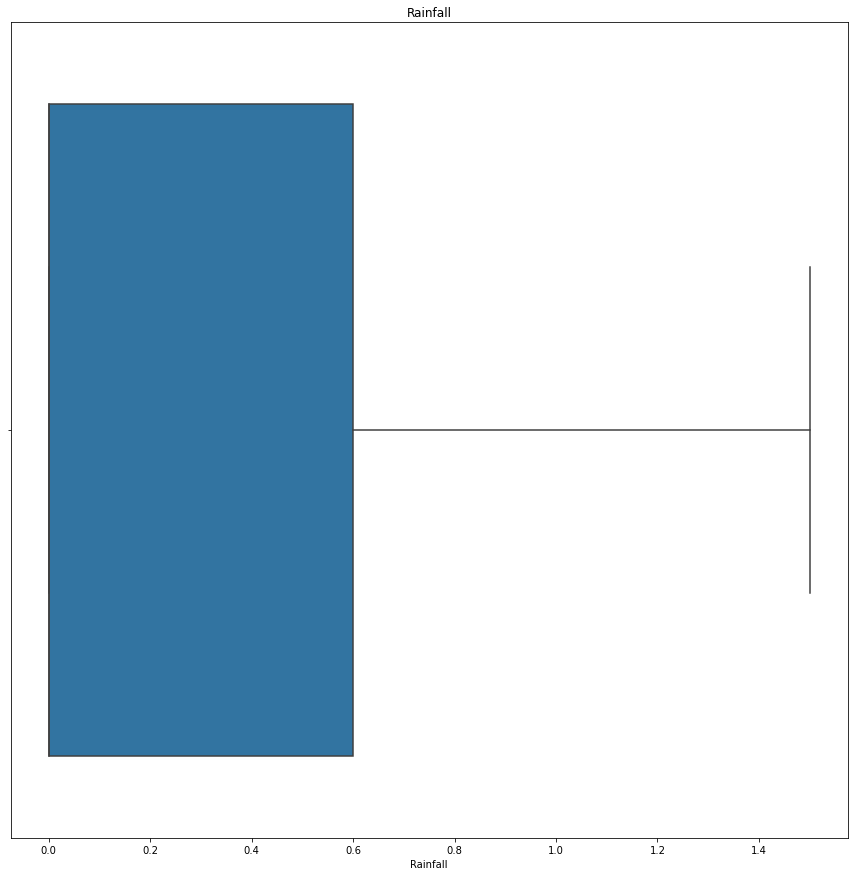

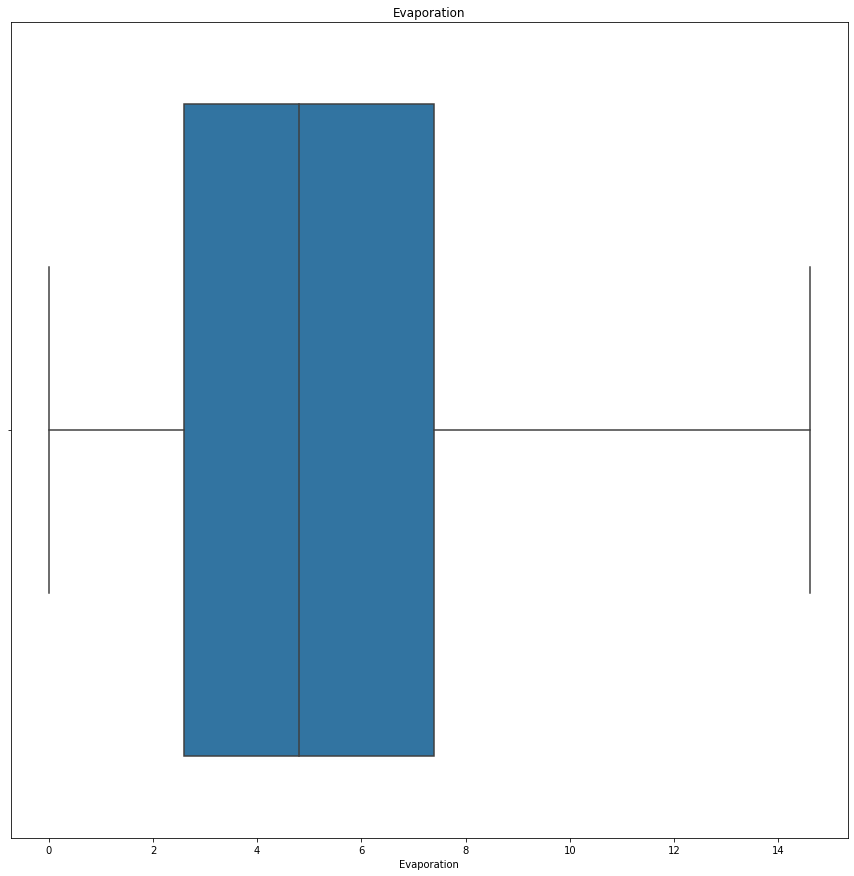

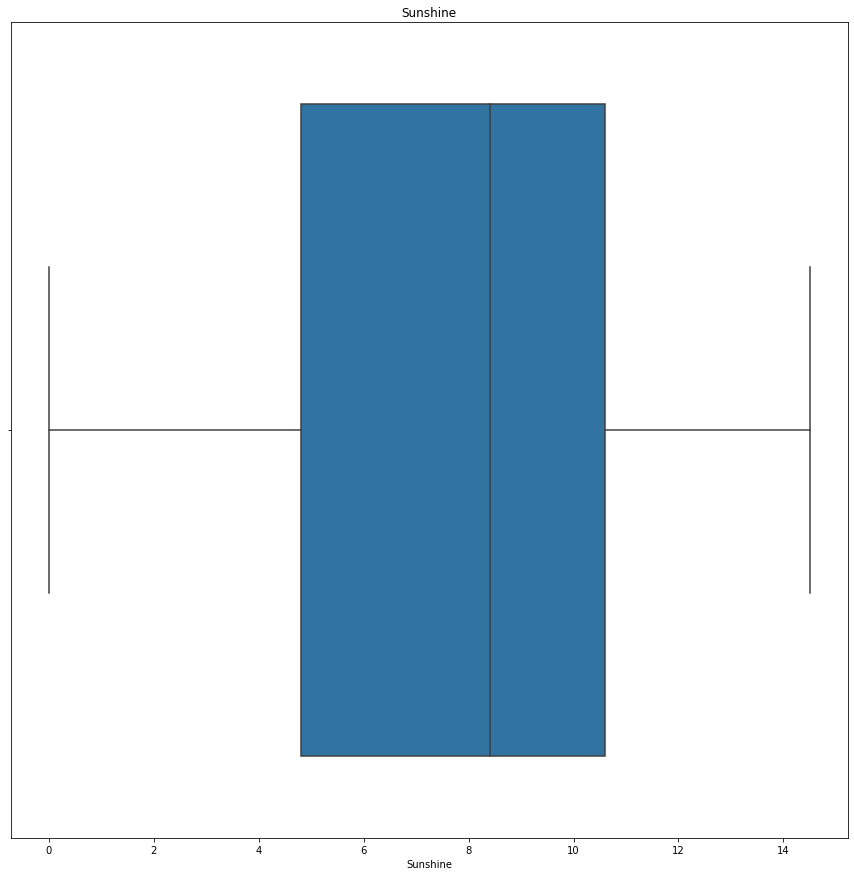

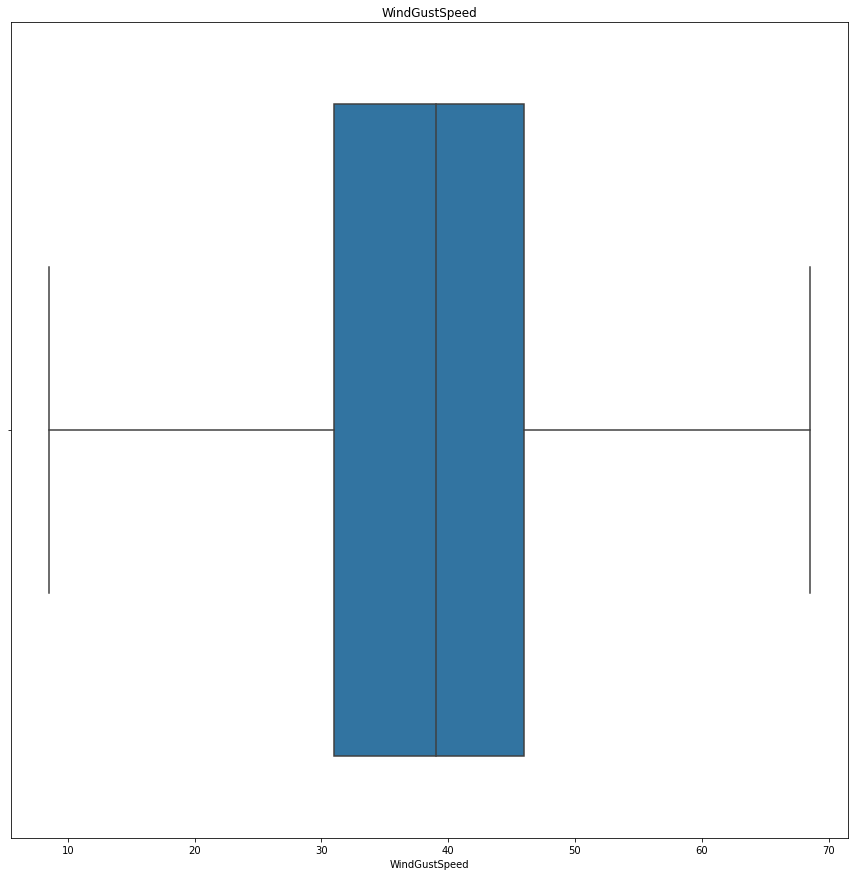

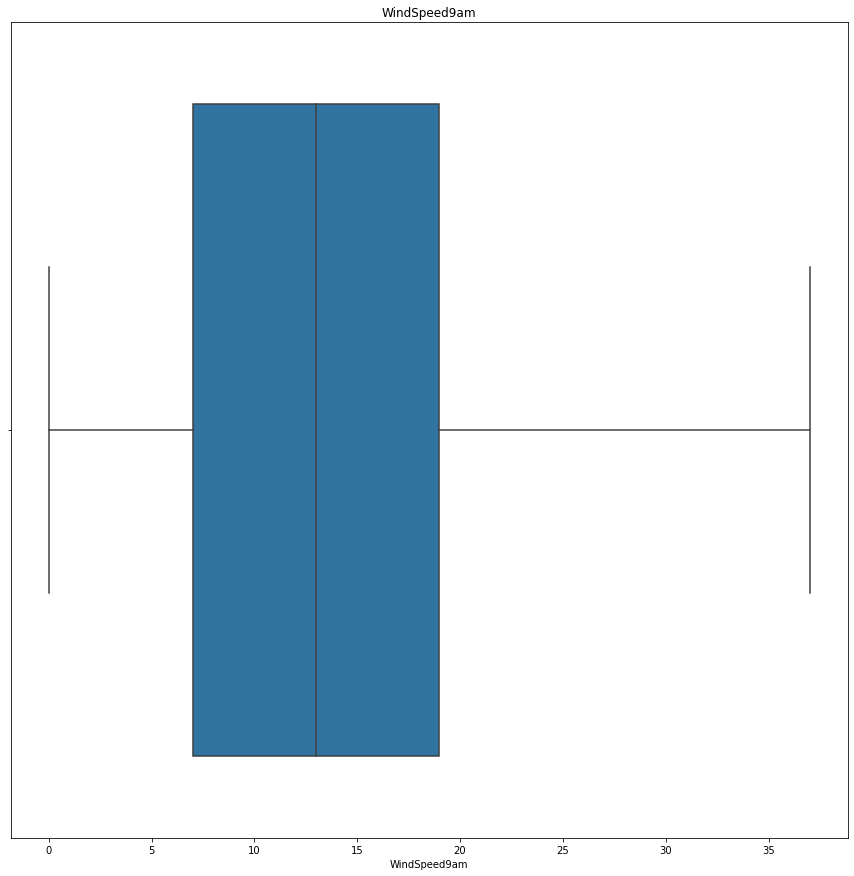

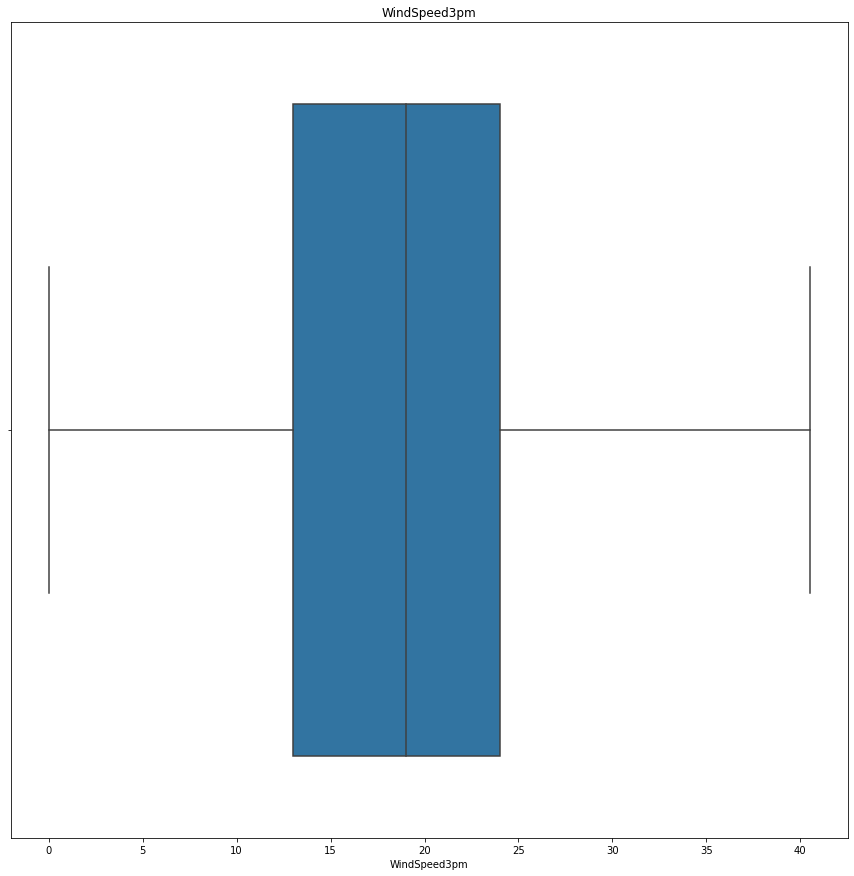

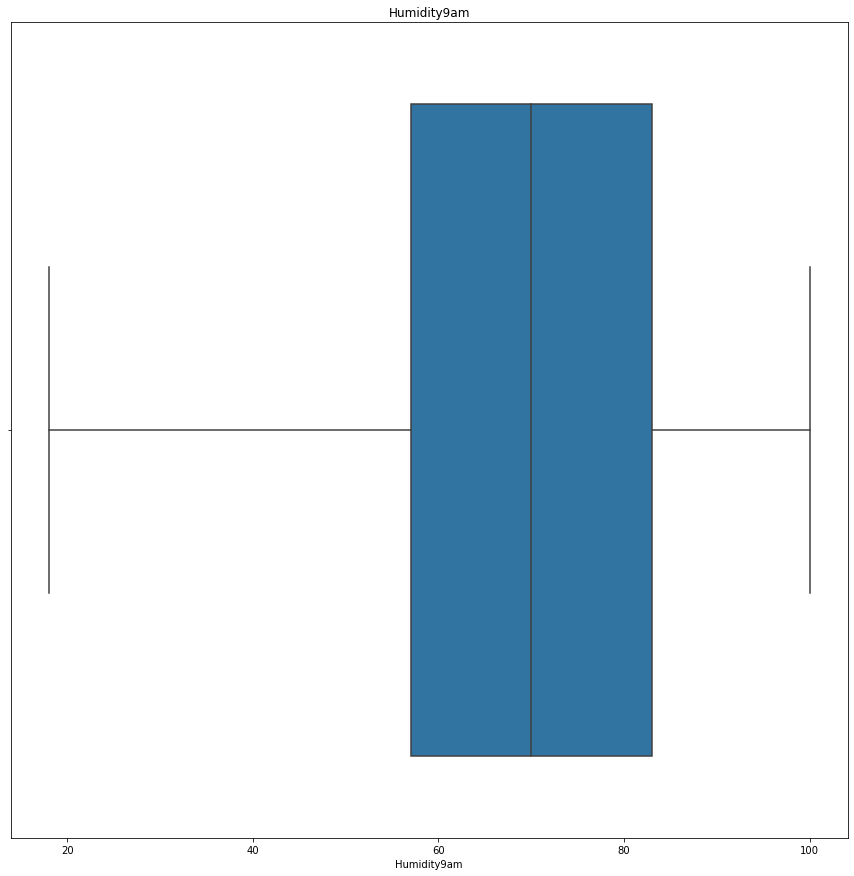

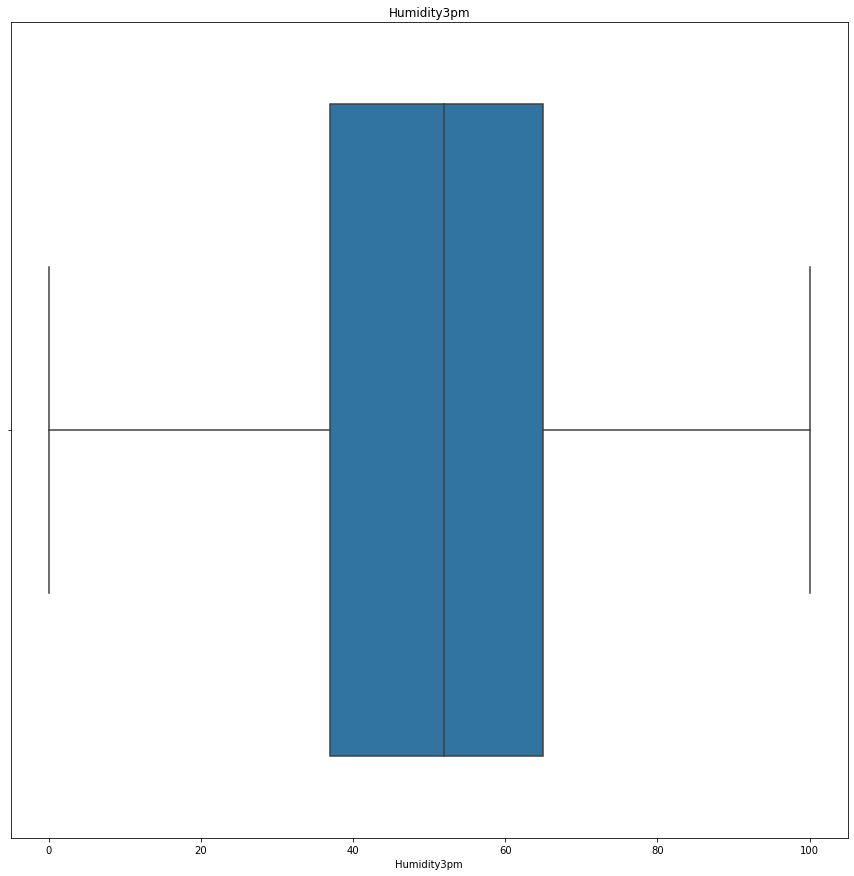

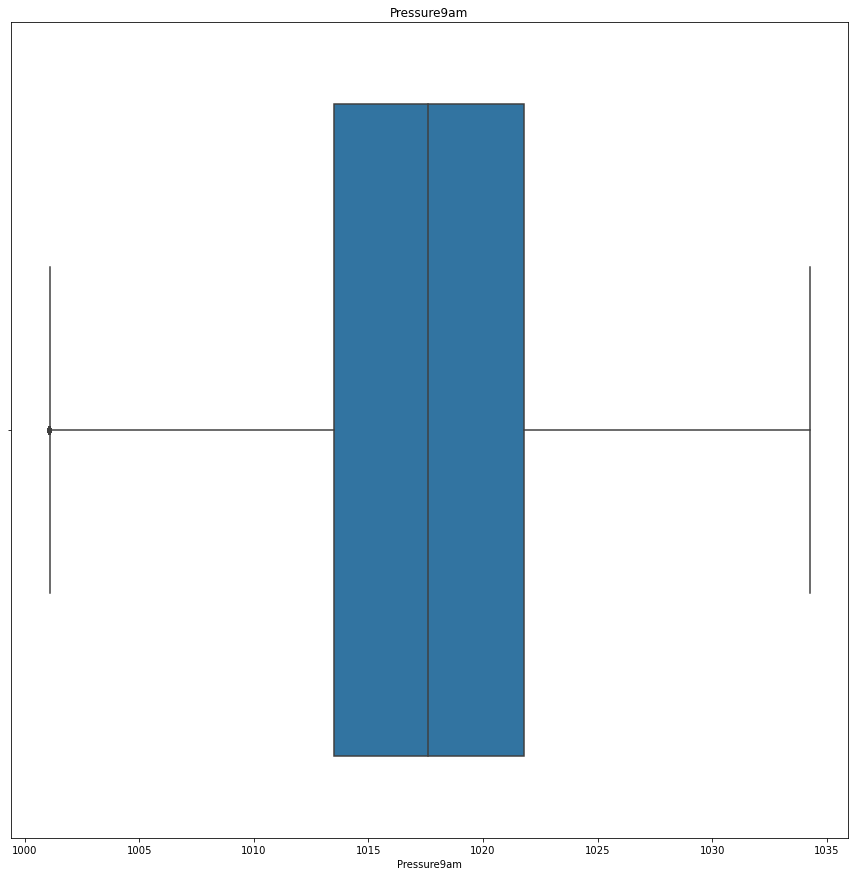

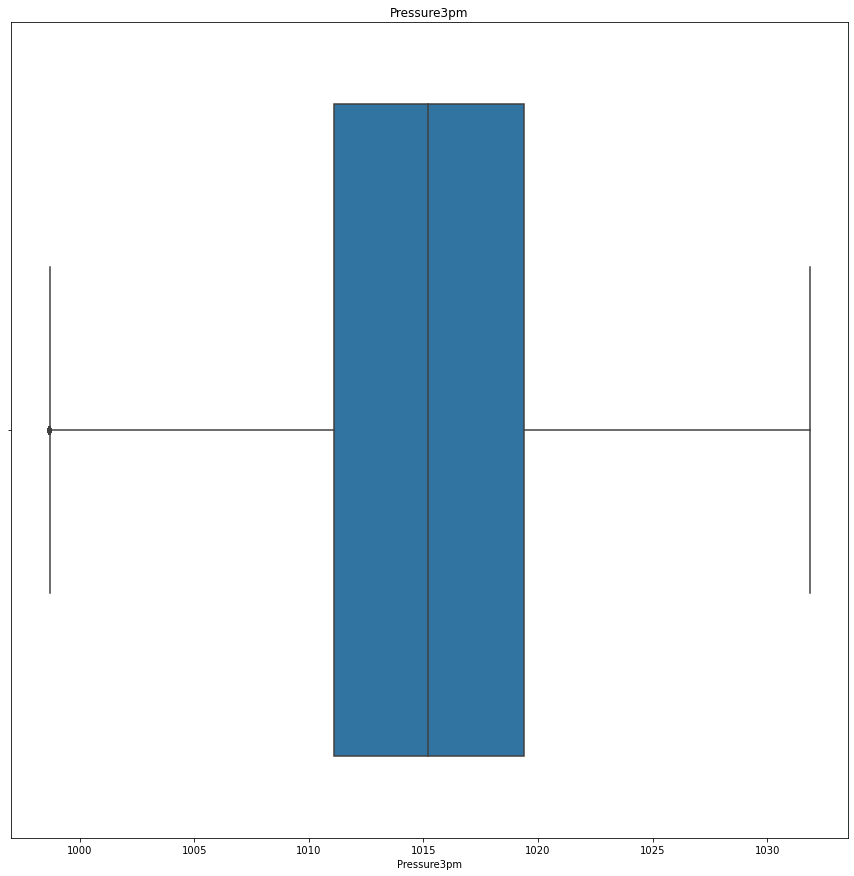

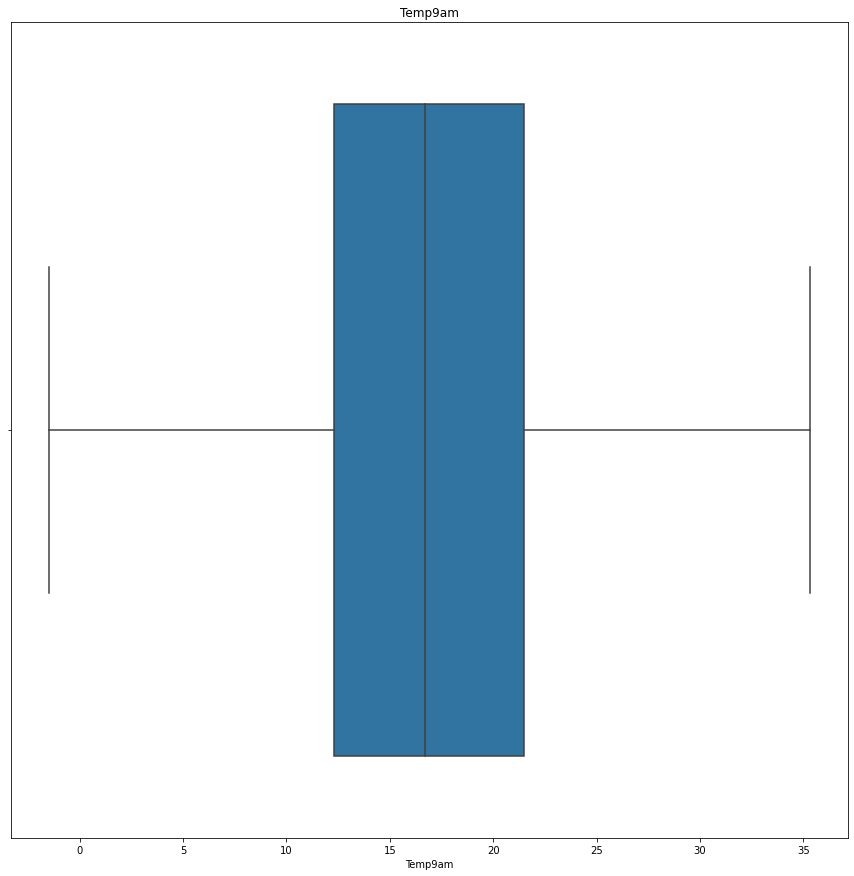

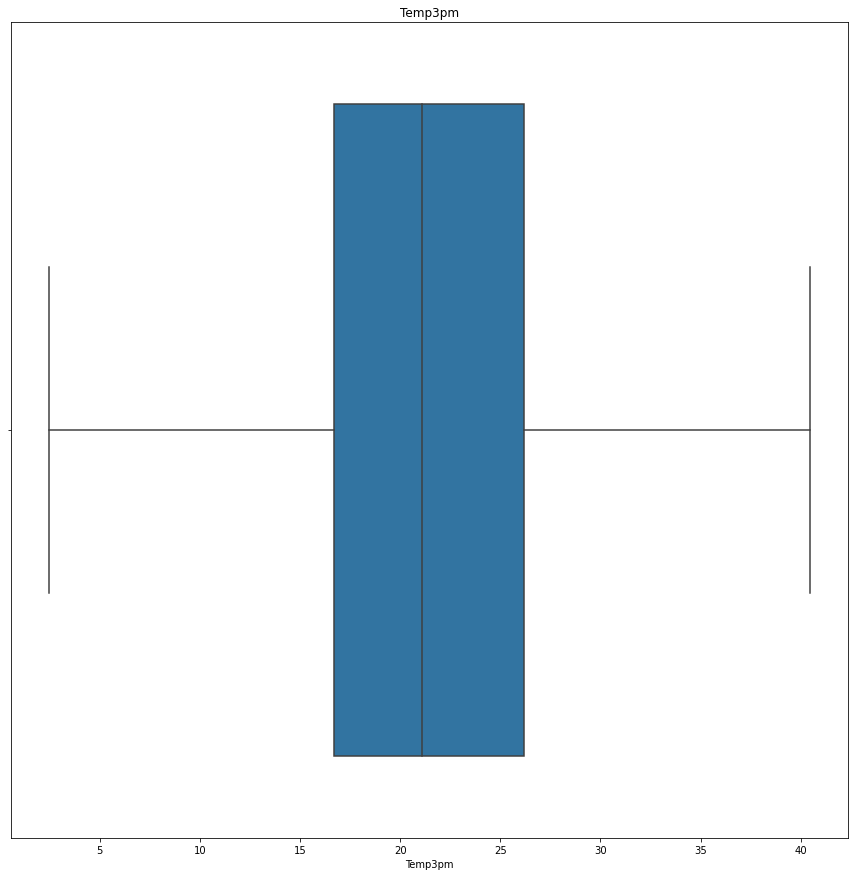

<Figure size 1080x1080 with 0 Axes>

In [68]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

The above plots clerly indicate that all the outliers have been removed(treated) as there are no points to the left and right of minimum and maximum point respectively.

# VISUALIZATION

In [69]:
locations = {1:'Portland', 2:'Cairns', 3:'Walpole', 4:'Dartmoor', 5:'MountGambier',
       6:'NorfolkIsland', 7:'Albany',8: 'Witchcliffe', 9:'CoffsHarbour', 10:'Sydney',
       11:'Darwin', 12:'MountGinini', 13:'NorahHead', 14:'Ballarat', 15:'GoldCoast',
       16:'SydneyAirport', 17:'Hobart', 18:'Watsonia', 19:'Newcastle', 20:'Wollongong',
       21:'Brisbane', 22:'Williamtown', 23:'Launceston', 24:'Adelaide', 25:'MelbourneAirport',
       26:'Perth', 27:'Sale', 28:'Melbourne', 29:'Canberra', 30:'Albury', 31:'Penrith',
       32:'Nuriootpa', 33:'BadgerysCreek', 34:'Tuggeranong', 35:'PerthAirport', 36:'Bendigo',
       37:'Richmond', 38:'WaggaWagga', 39:'Townsville', 40:'PearceRAAF', 41:'SalmonGums',
       42:'Moree', 43:'Cobar', 44:'Mildura', 45:'Katherine', 46:'AliceSprings', 47:'Nhil',
       48:'Woomera', 49:'Uluru'}

The dictionary "locations" contains the name of the cities denoted by the corresponding integers in the dataset to be utilized in the next plot.

['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier', 'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney', 'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast', 'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong', 'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport', 'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith', 'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo', 'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums', 'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil', 'Woomera', 'Uluru']
[3009, 3040, 3006, 3009, 3040, 3009, 3040, 3009, 3009, 3344, 3193, 3040, 3004, 3040, 3040, 3009, 3193, 3009, 3039, 3040, 3193, 3009, 3040, 3193, 3009, 3193, 3009, 3193, 3436, 3040, 3039, 3009, 3009, 3039, 3009, 3040, 3009, 3009, 3040, 3009, 3001, 3009, 3009, 3009, 1578, 3040, 1578, 3009, 1578]


Text(0.5, 1.0, 'Number of records for each location')

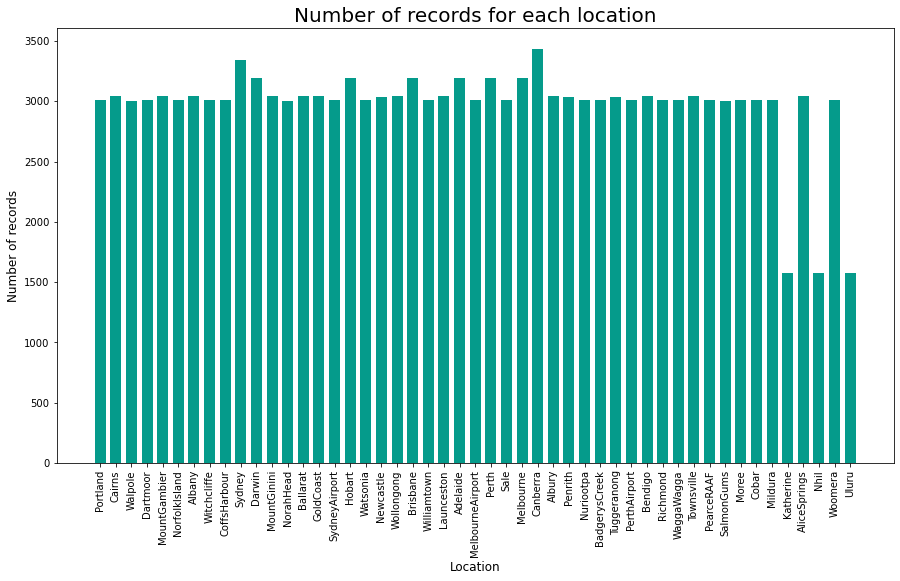

In [70]:
plt.rcParams["figure.figsize"] = (15,8)

colorPalette=["#272961","#F5B049","#059B8B","#EDE3B4","#D84B25"]
x=list(locations.values())
print(x)
dictCount=dict(df.groupby("Location")["Rainfall"].count())
y=list(dictCount.values())
print(y)
plt.xticks(rotation=90)
plt.bar(x, y, color =colorPalette[2],width = 0.7)
plt.xlabel("Location",fontsize=12)
plt.ylabel("Number of records",fontsize=12)
plt.title("Number of records for each location",fontsize=20)

The above chart displays the number of records present in the dataset for each location.

In [71]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}

Text(0.5, 1.0, 'Wind Gust Direction Records')

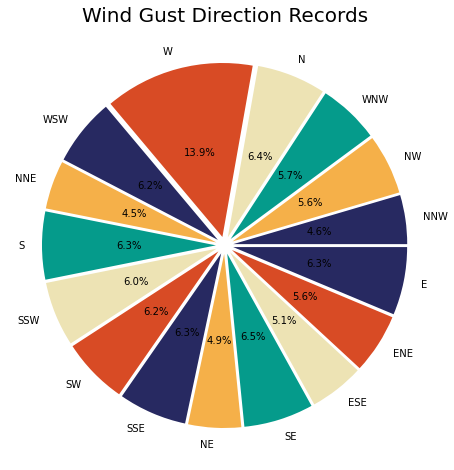

In [72]:
plt.rcParams["figure.figsize"] = (8,8)

pieData=df.groupby("WindGustDir")["WindGustDir"].count()
labels=windgustdir.keys()


plt.pie(x=pieData, autopct="%.1f%%", explode=[0.05]*len(pieData), labels=labels, pctdistance=0.5,colors=colorPalette)
plt.title("Wind Gust Direction Records",fontsize=20)

The plot indicates the percentage of each record as stored in the dataset by the column "WindGustDir".<br>
The labels are the unique values found in the column and indicate the direction of wind gust.

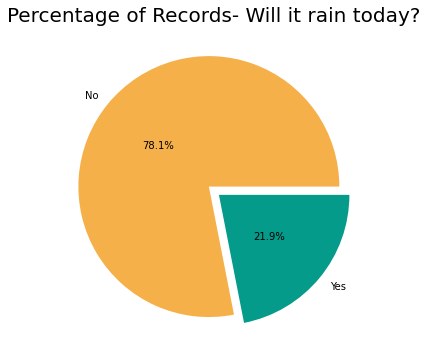

In [73]:
plt.rcParams["figure.figsize"] = (6,6)
pieData=df.groupby("RainToday")["RainToday"].count()
pieData
labels=["No","Yes"]
plt.pie(x=pieData, autopct="%.1f%%", explode=[0.05]*len(pieData),labels=labels, pctdistance=0.5,colors=colorPalette[1:])
plt.title("Percentage of Records- Will it rain today?",fontsize=20)
plt.show()

The percentage of records that hold the result whether it would rain today or not is shown by the above plot. It 

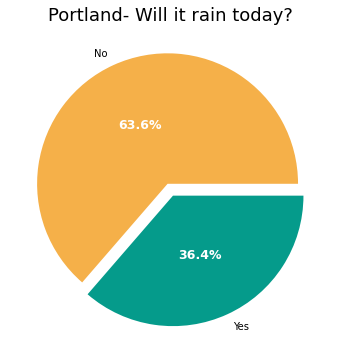

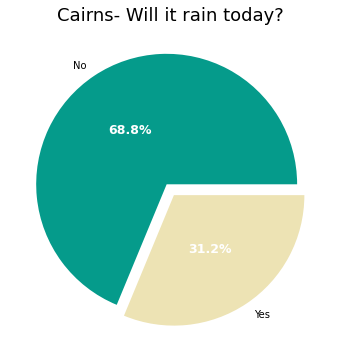

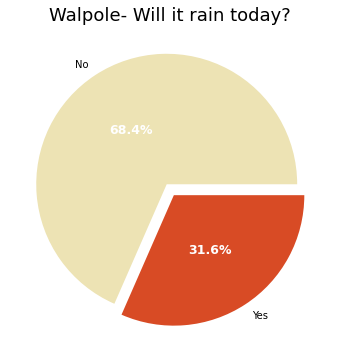

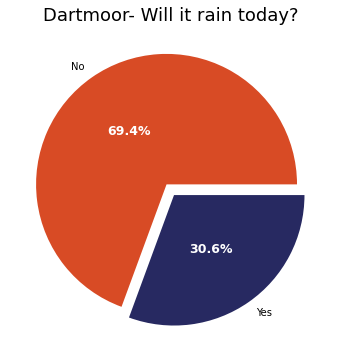

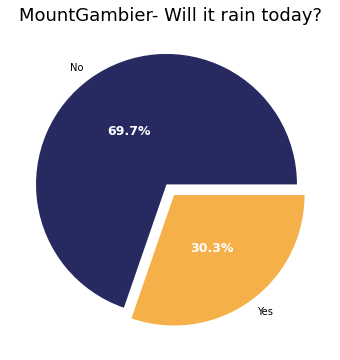

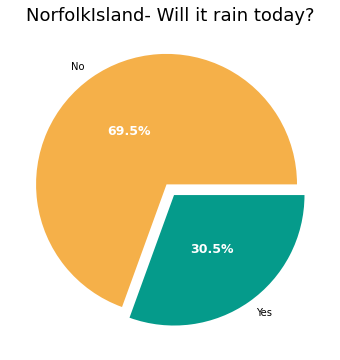

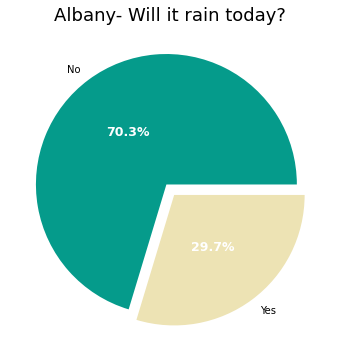

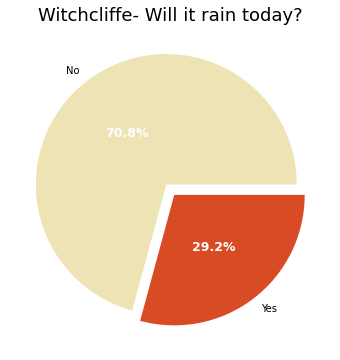

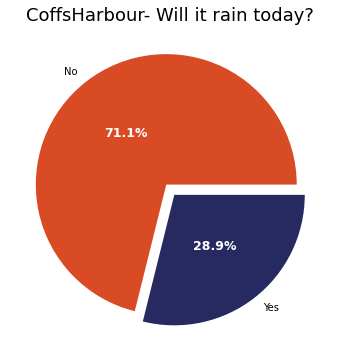

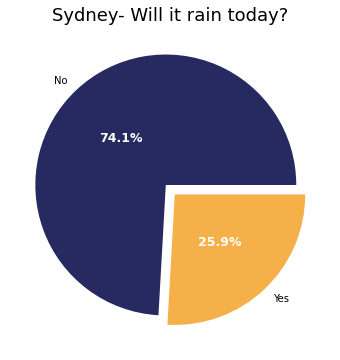

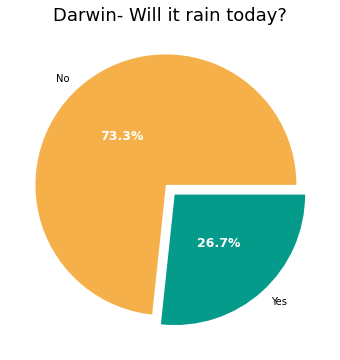

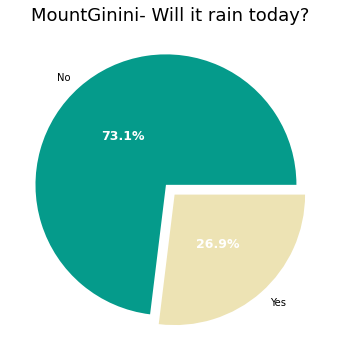

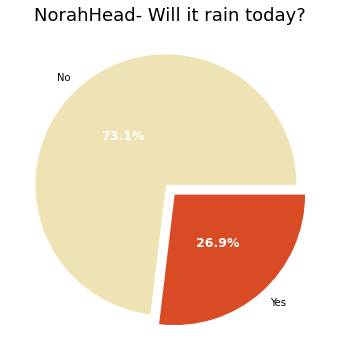

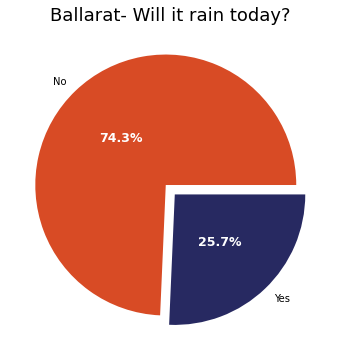

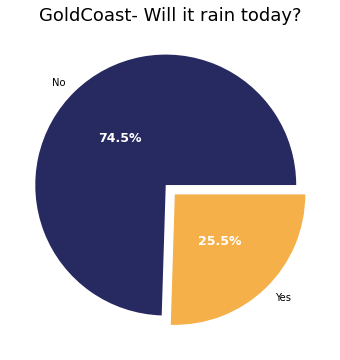

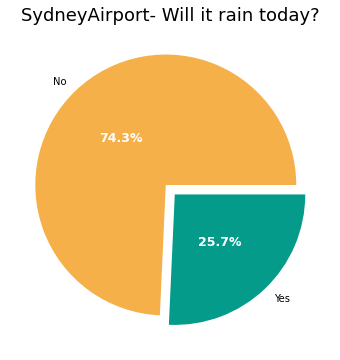

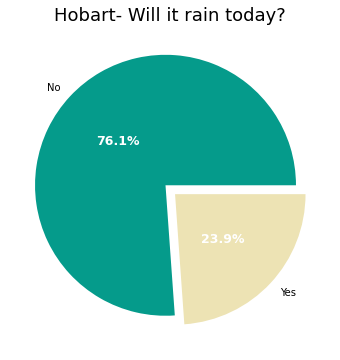

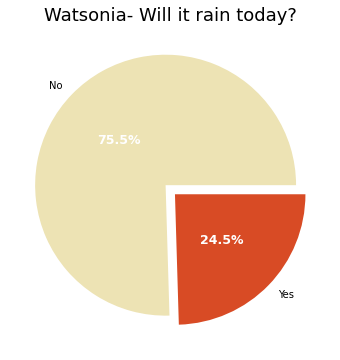

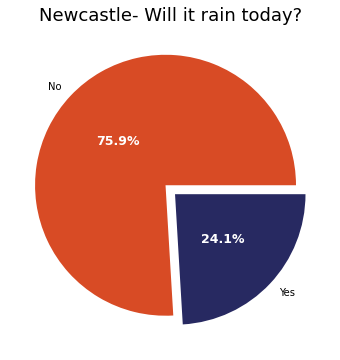

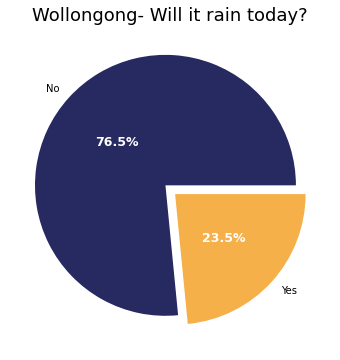

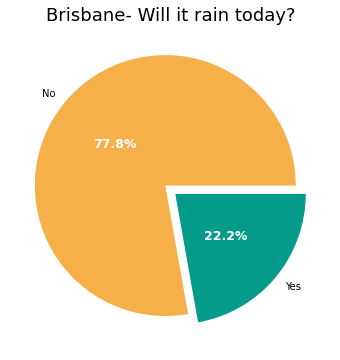

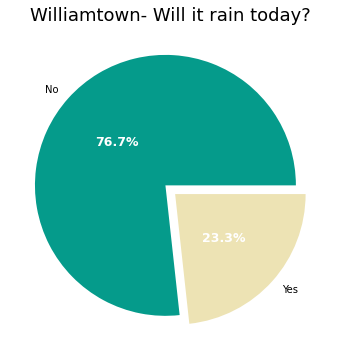

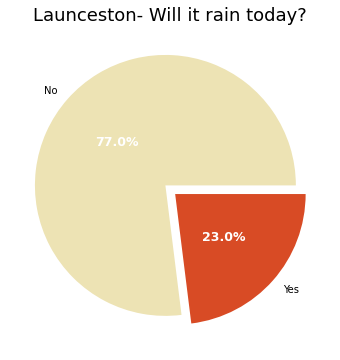

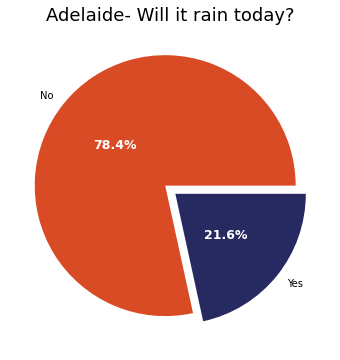

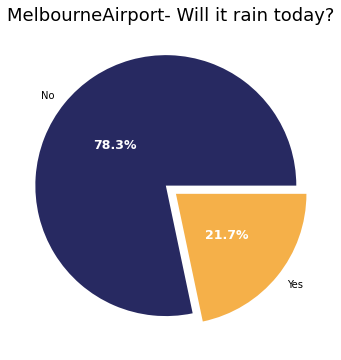

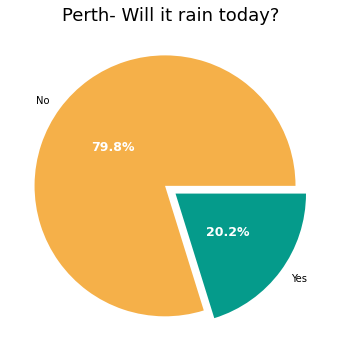

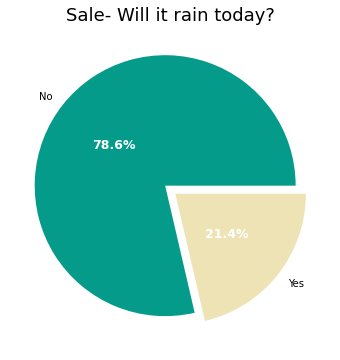

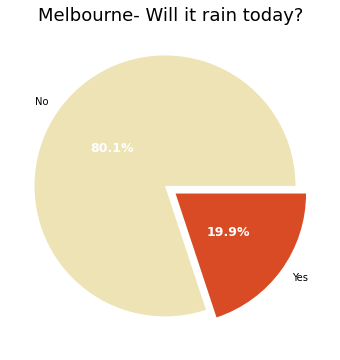

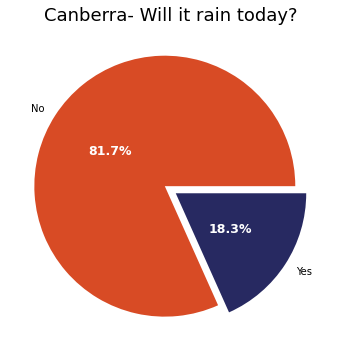

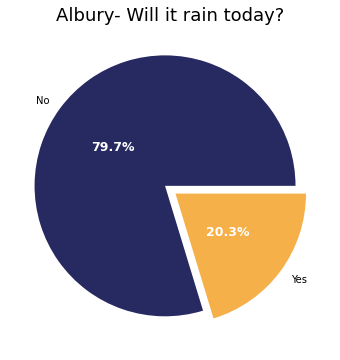

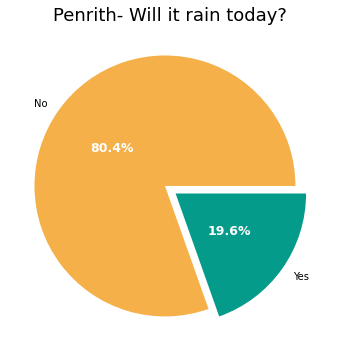

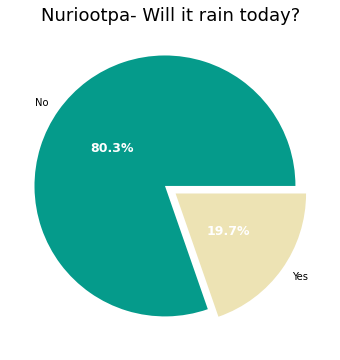

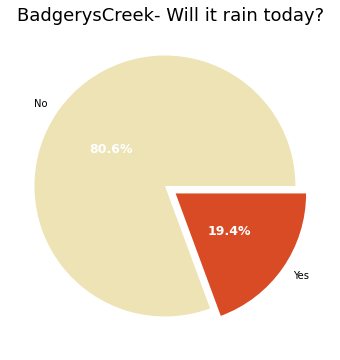

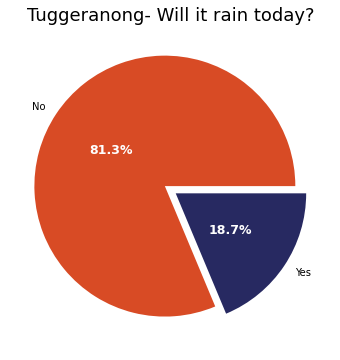

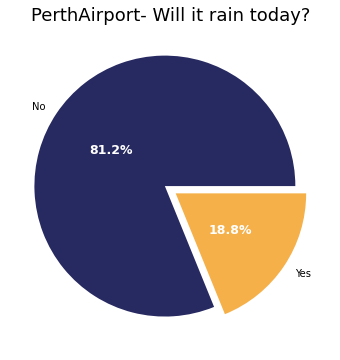

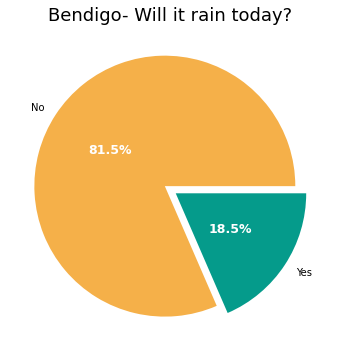

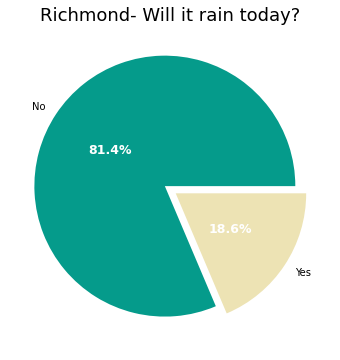

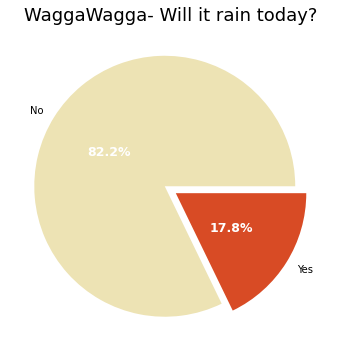

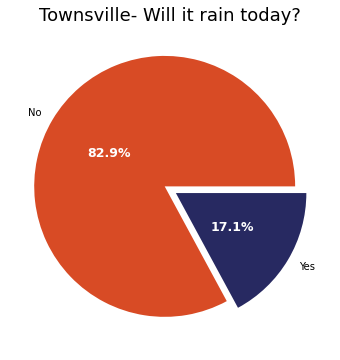

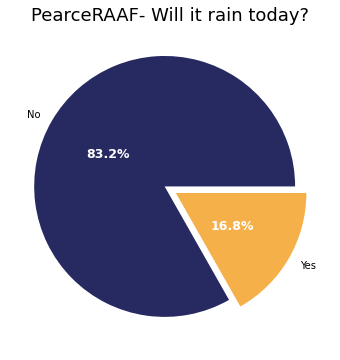

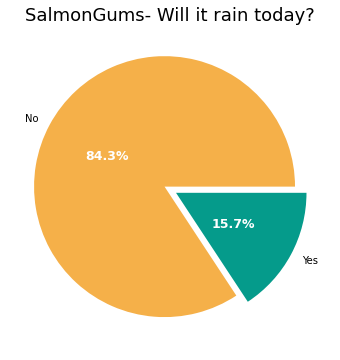

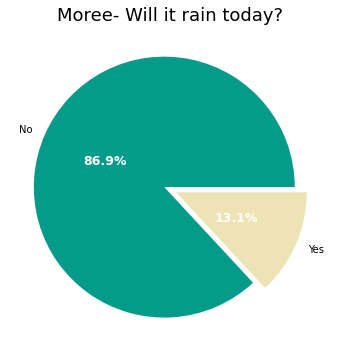

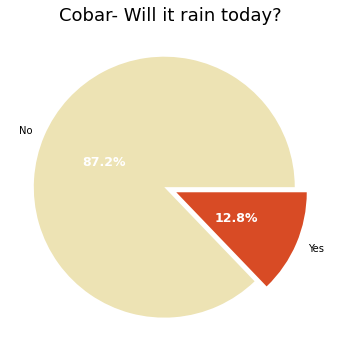

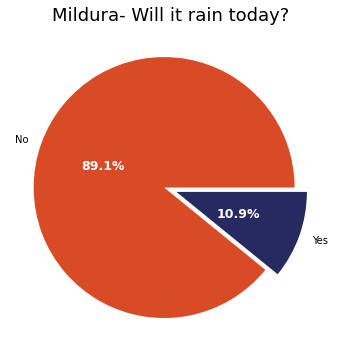

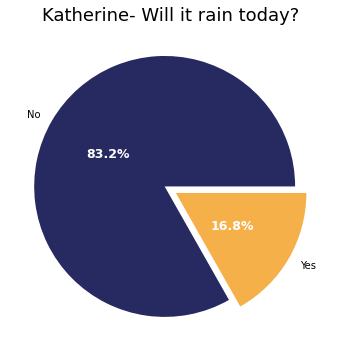

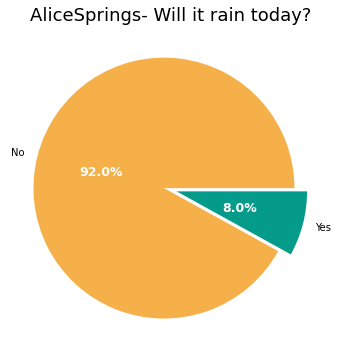

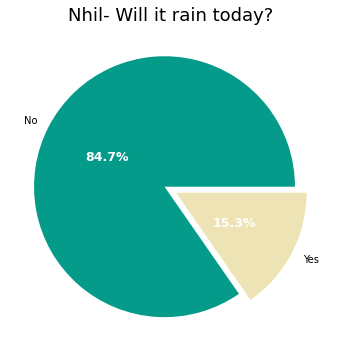

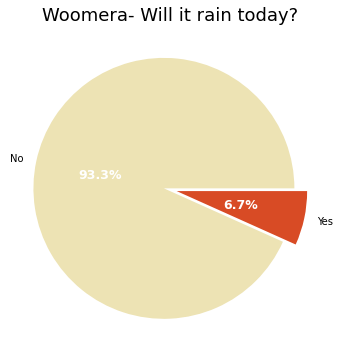

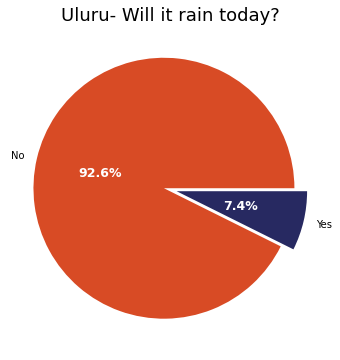

In [74]:
plt.rcParams["figure.figsize"] = (6,6)
for i in range(1,50):
    pieData=df[(df["Location"]==i)].groupby("RainToday")["RainToday"].count()
    labels=["No","Yes"]
    _, _, autopcts=plt.pie(x=pieData, autopct="%.1f%%", explode=[0.05]*len(pieData),labels=labels, pctdistance=0.5,colors=[colorPalette[i%5],colorPalette[(i+1)%5]])
    plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
    plt.title(locations[i]+"- Will it rain today?",fontsize=18)
    plt.show()

The code snippet plots percentage of rain records for each location.<br>
For a each location, the count of number of records whether it will rain today or not is found out.<br>
For every location, the records which indicate the surety of rainfall today are very less compared to the contrary. Hence, this has to be taken care of before evaluation.
The adjacent cell helps understanding this.

In [75]:
pieData=df[(df["Location"]==1)].groupby("RainToday")["RainToday"].count()
pieData

RainToday
0    1915
1    1094
Name: RainToday, dtype: int64

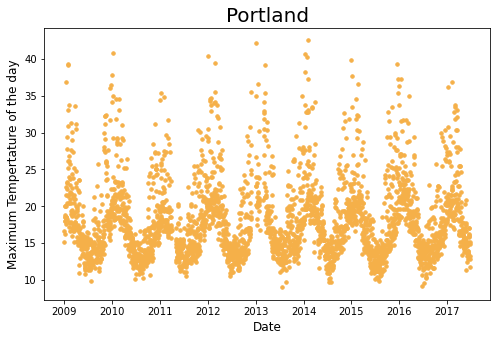

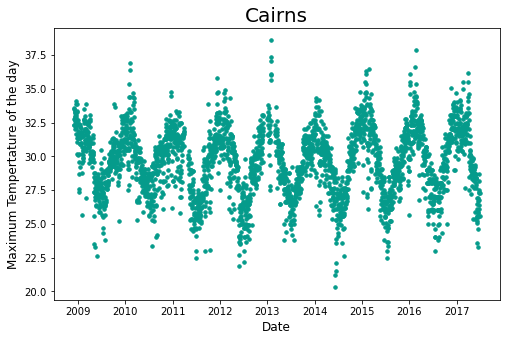

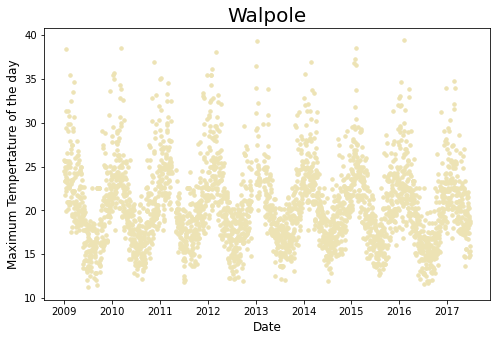

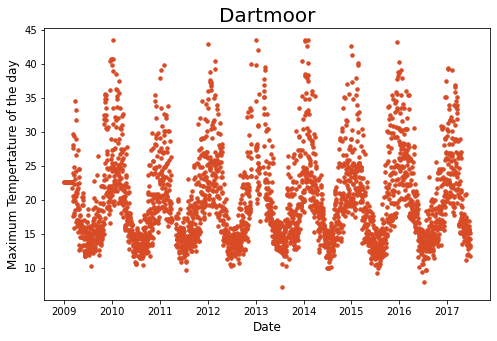

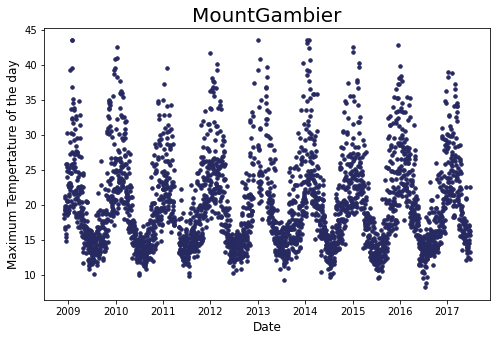

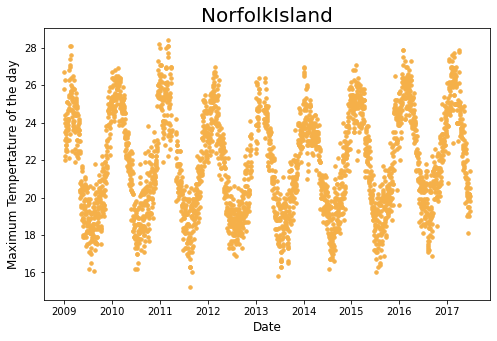

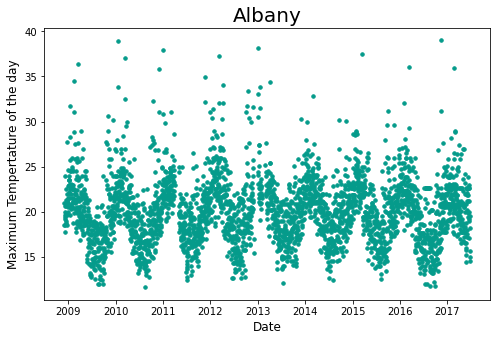

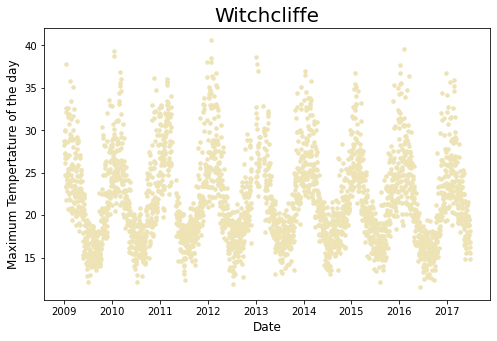

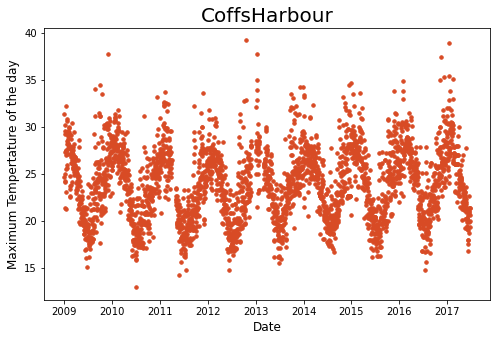

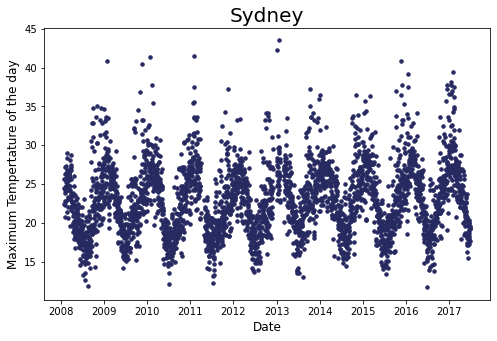

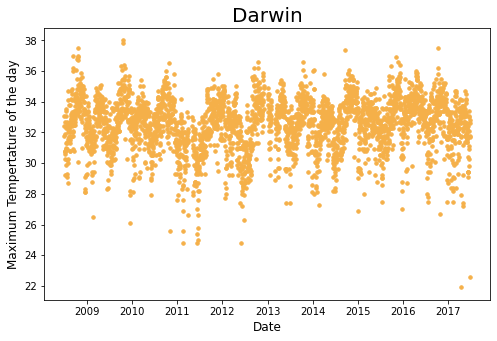

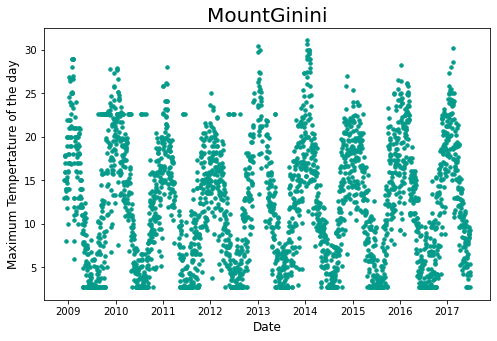

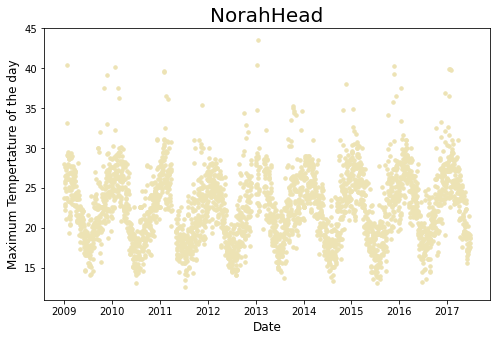

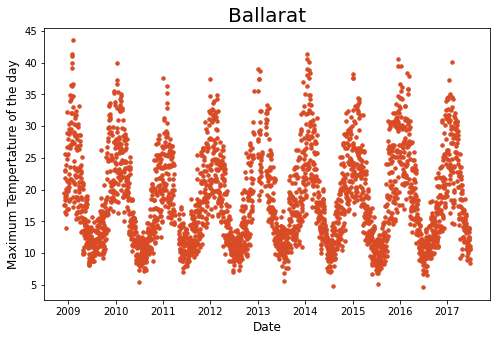

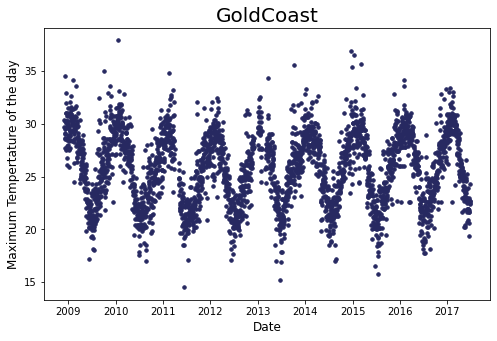

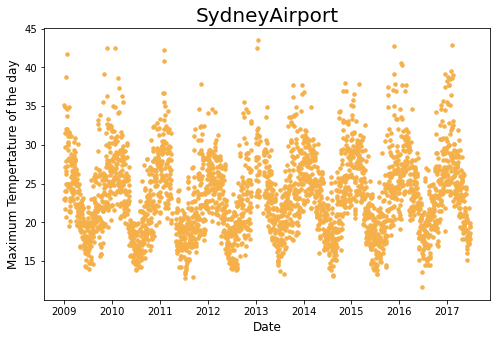

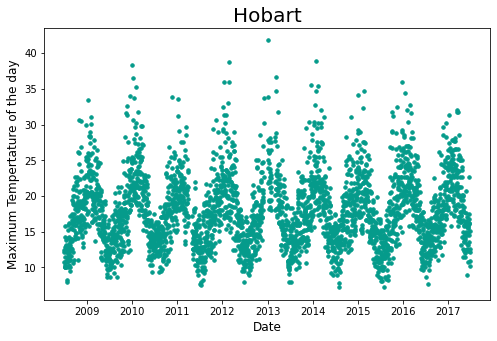

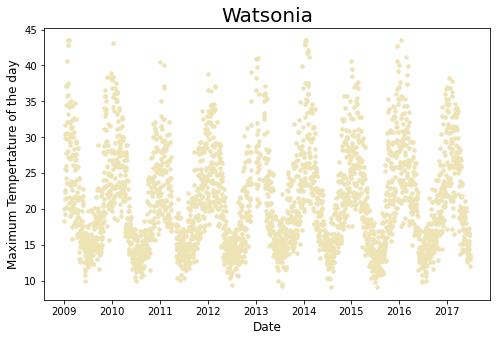

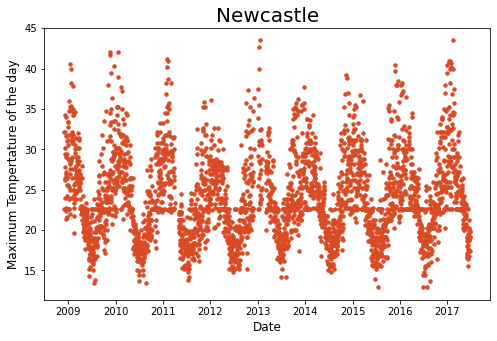

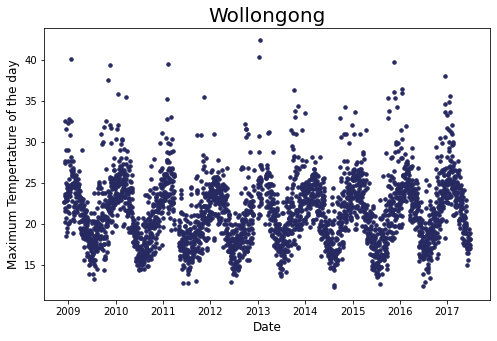

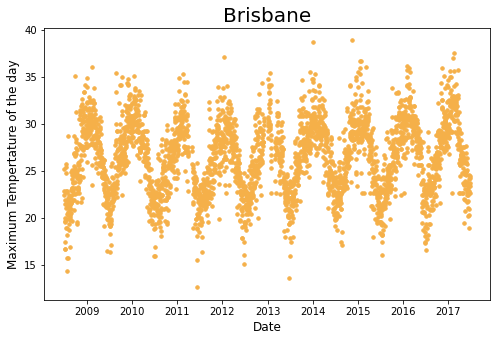

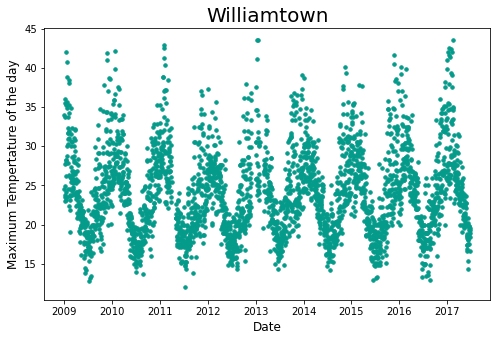

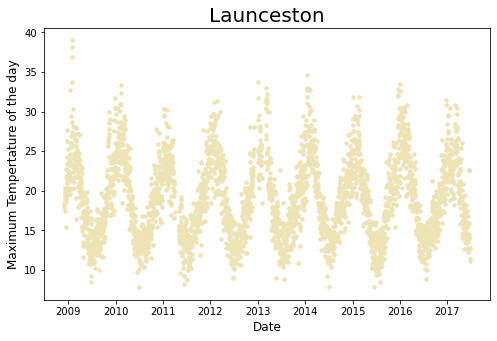

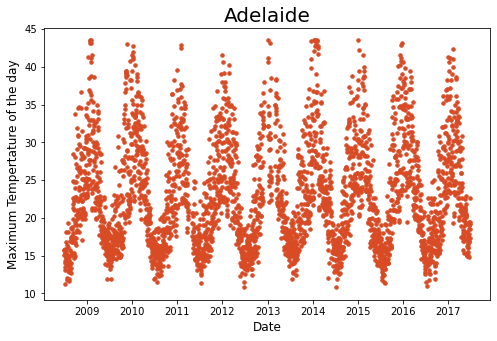

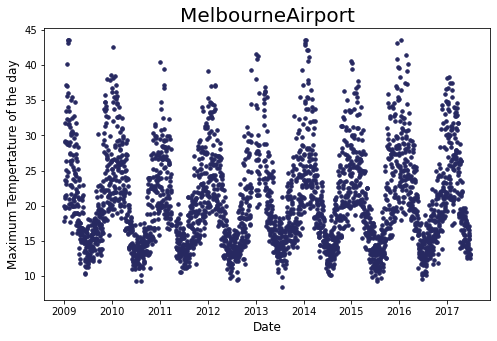

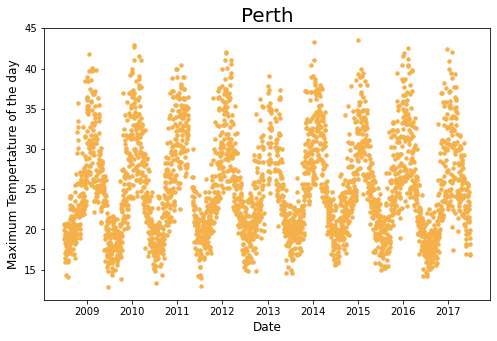

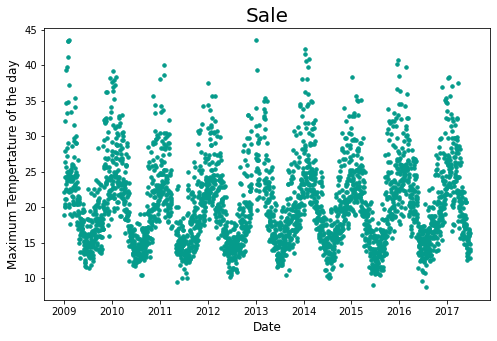

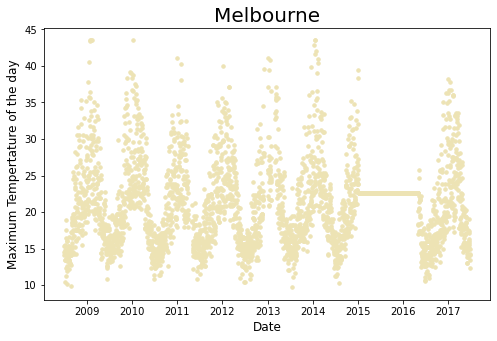

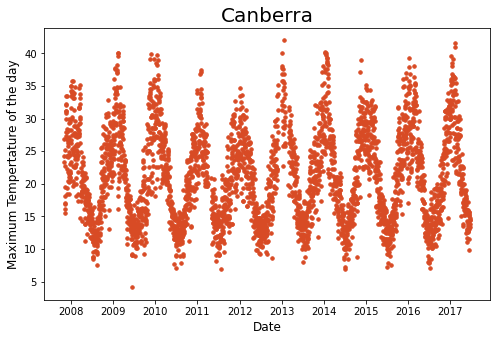

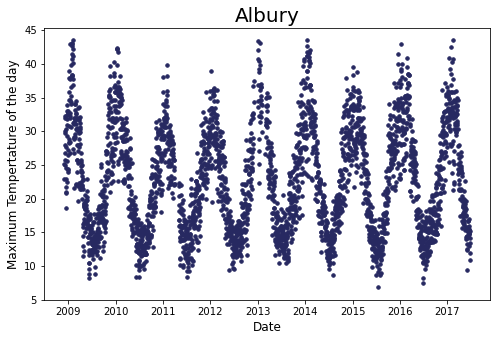

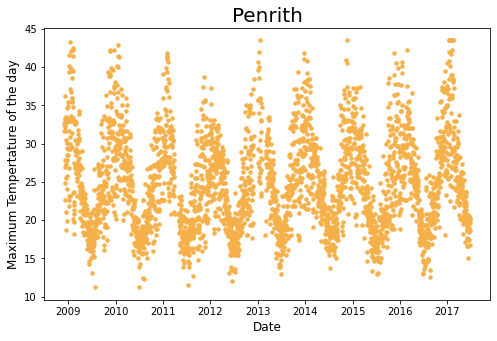

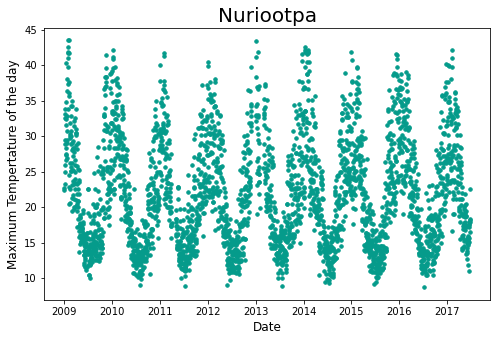

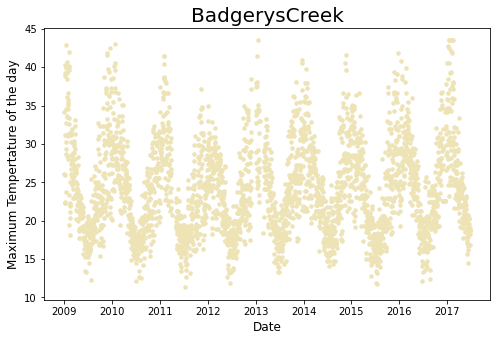

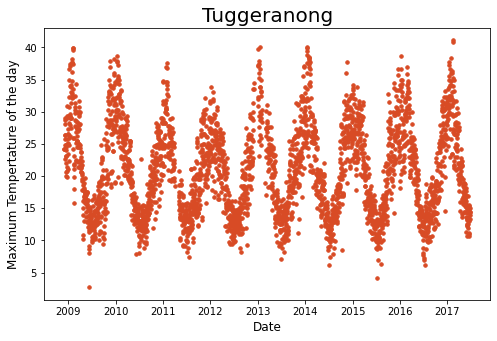

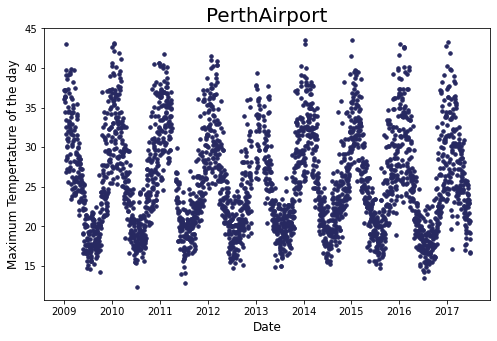

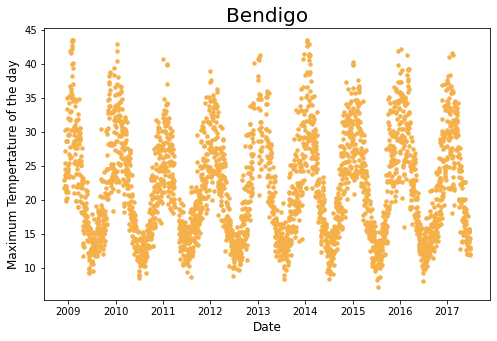

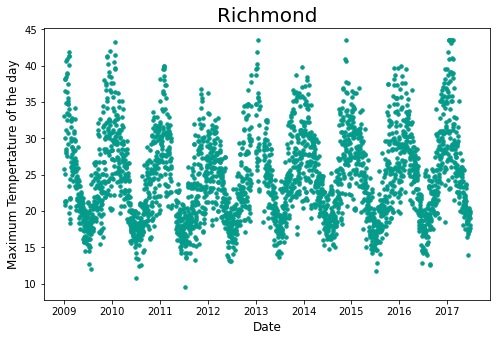

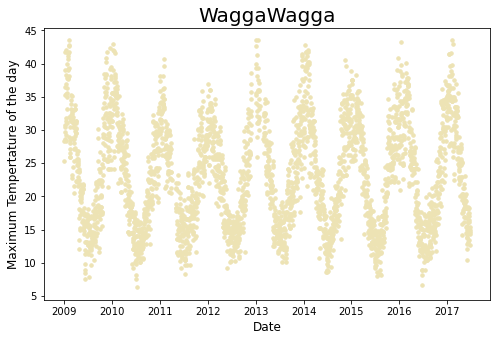

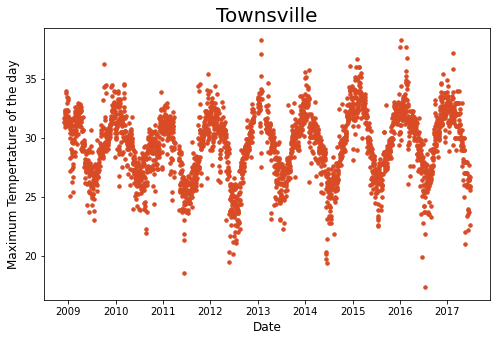

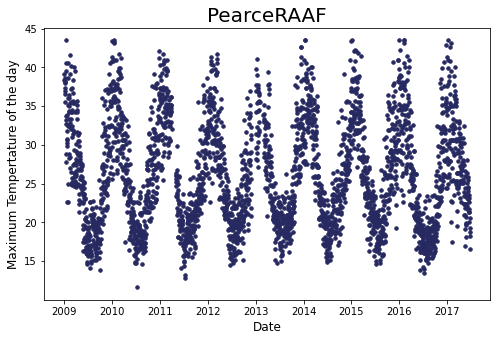

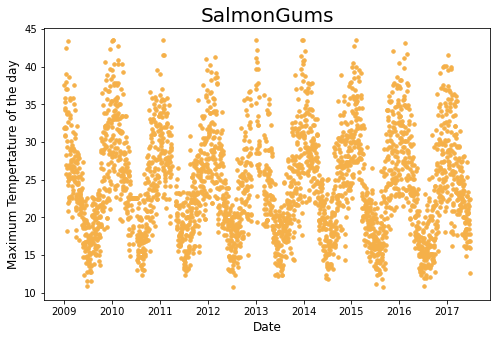

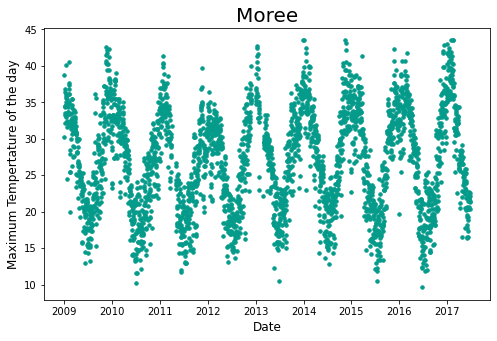

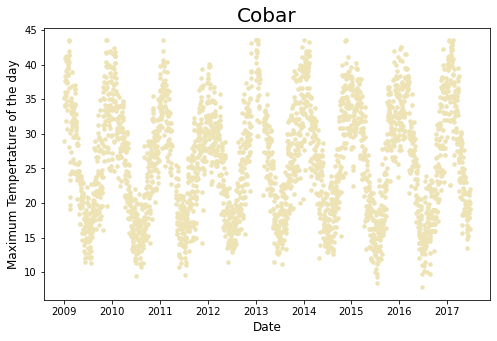

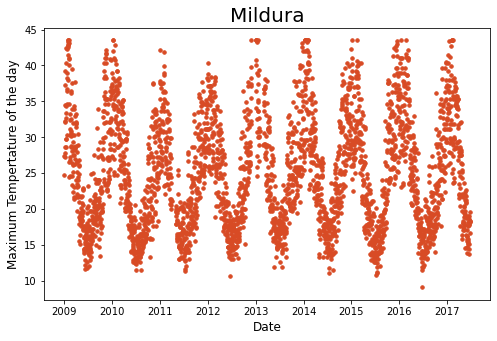

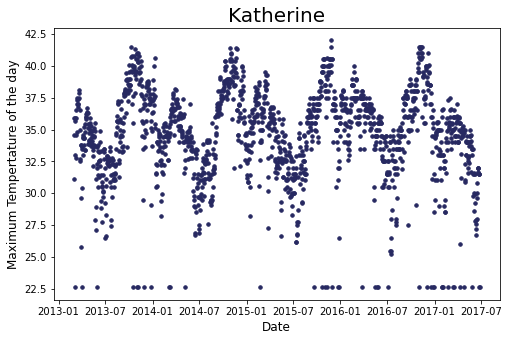

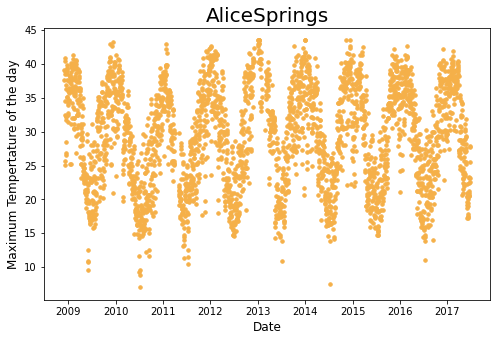

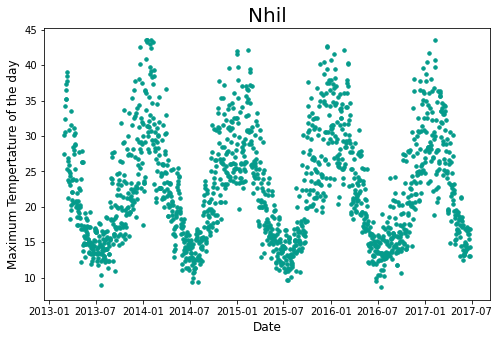

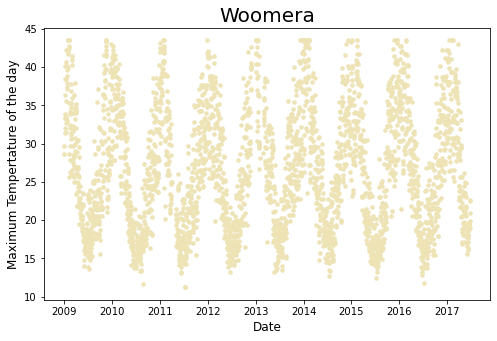

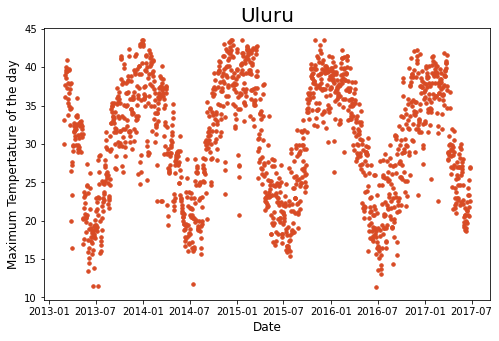

In [76]:
plt.rcParams["figure.figsize"] = (8,5)

for i in range(1,50):
    plt.scatter(df[(df["Location"]==i)]["Date"],df[(df["Location"]==i)]["MaxTemp"],color=colorPalette[i%5],s=12)
    plt.xlabel("Date",fontsize=12)
    plt.ylabel("Maximum Tempertature of the day",fontsize=12)
    plt.title(locations[i],fontsize=20)
    plt.show()

To get an overview how uniform is the record we have, we plot maximum temperature against the day on which it is produced. These plots are produced for all 49 locations.<br>
The plots specifies uniformity of data which further indicates its accuracy.<br>
The points high above may indicate summer season while the lower ones may indicate winter season. These seasons alternate throughout the plots.

# REGRESSION ANALYSIS

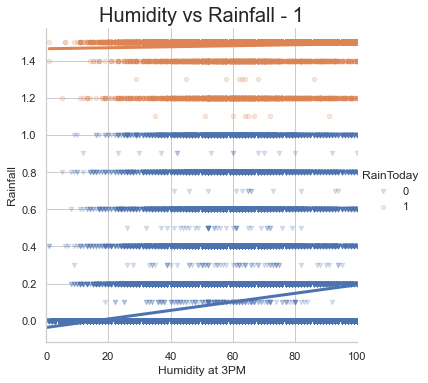

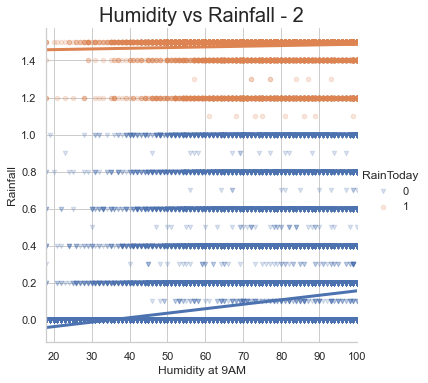

In [77]:
sns.set(rc={'figure.figsize':(20,15)})
sns.set_style('whitegrid')
sns.color_palette("hls", 8)
sns.lmplot(x ='Humidity3pm', y ='Rainfall', data = df,hue="RainToday" ,markers =['v', 'o'], scatter_kws ={'s':20, 'alpha': 0.2},line_kws={'lw': 3})

plt.xlabel("Humidity at 3PM",fontsize=12)
plt.ylabel("Rainfall",fontsize=12)
plt.title("Humidity vs Rainfall - 1",fontsize=20)
plt.show()

sns.lmplot(x ='Humidity9am', y ='Rainfall', data = df,hue="RainToday" ,markers =['v', 'o'], scatter_kws ={'s':20, 'alpha': 0.2},line_kws={'lw': 3})

plt.xlabel("Humidity at 9AM",fontsize=12)
plt.ylabel("Rainfall",fontsize=12)
plt.title("Humidity vs Rainfall - 2",fontsize=20)
plt.show()

These graphs plot the regression lines between Humidity and Rainfall. The "hue" parameter helps plot these for two differently recorded data based on:
<ul>
    <li>It will rain today</li>
    <li>It won't rain today</li>
</ul>
The graph throws light on how humidity and rainfall are related. In general, higher humidity results in more rainfall.

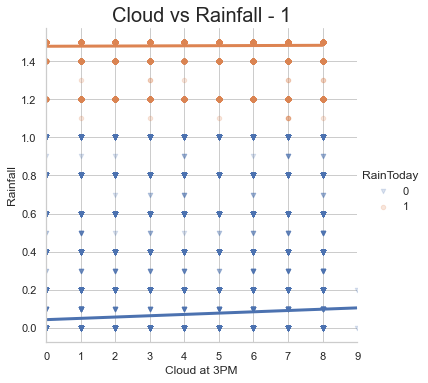

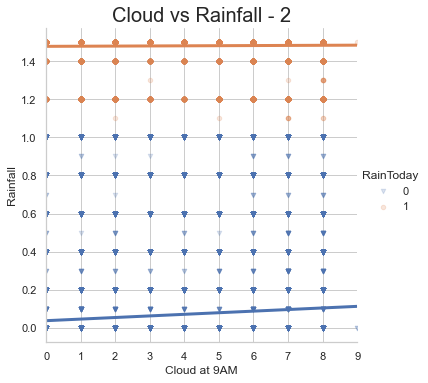

In [78]:
sns.lmplot(x ='Cloud3pm', y ='Rainfall', data = df,hue="RainToday" ,markers =['v', 'o'], scatter_kws ={'s':20, 'alpha': 0.2},line_kws={'lw': 3})

plt.xlabel("Cloud at 3PM",fontsize=12)
plt.ylabel("Rainfall",fontsize=12)
plt.title("Cloud vs Rainfall - 1",fontsize=20)
plt.show()

sns.lmplot(x ='Cloud9am', y ='Rainfall', data = df,hue="RainToday" ,markers =['v', 'o'], scatter_kws ={'s':20, 'alpha': 0.2},line_kws={'lw': 3})

plt.xlabel("Cloud at 9AM",fontsize=12)
plt.ylabel("Rainfall",fontsize=12)
plt.title("Cloud vs Rainfall - 2",fontsize=20)
plt.show()

The graph plots regression line between cloud cover and rainfall. The data plotted has been divided in the same way as mentioned in the last graph.<br>
The plot indicates a greater cloud cover would bring more rainfall in general.

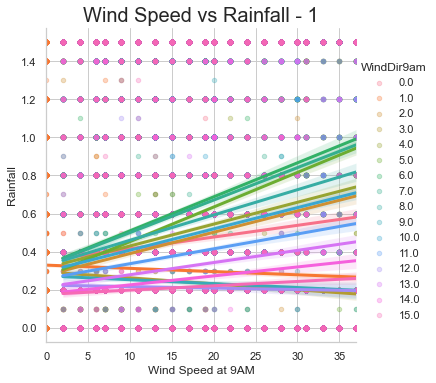

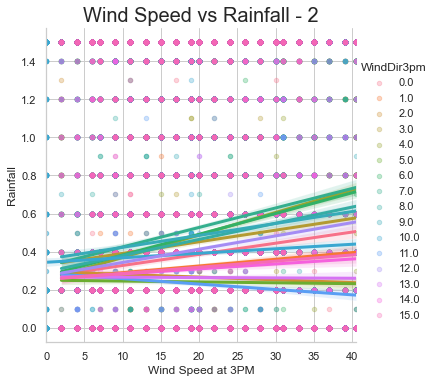

In [79]:
sns.lmplot(x ='WindSpeed9am', y ='Rainfall', data = df,hue="WindDir9am" , scatter_kws ={'s':20, 'alpha': 0.3},line_kws={'lw': 3})
plt.xlabel("Wind Speed at 9AM",fontsize=12)
plt.ylabel("Rainfall",fontsize=12)
plt.title("Wind Speed vs Rainfall - 1",fontsize=20)
plt.show()

sns.lmplot(x ='WindSpeed3pm', y ='Rainfall', data = df,hue="WindDir3pm" , scatter_kws ={'s':20, 'alpha': 0.3},line_kws={'lw': 3})
plt.xlabel("Wind Speed at 3PM",fontsize=12)
plt.ylabel("Rainfall",fontsize=12)
plt.title("Wind Speed vs Rainfall - 2",fontsize=20)
plt.show()

The above graph marks the regression lines between wind speed and rainfall during different times of the day. The first one keeps track of morning data while second one records afternoon data.<br>
The data has been divided according to the wind direction recorded at the same time. Different colors indicate different directions.<br>
It is also observed that directions in which the wind blows also play an important along with its speed. Some wind directions contribute to positive slope while some to negative.

# MODELLING AND EVALUATION

In [80]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

The variable <u>X</u> contains the dataframe which holds the records based on which prediction is to be made. <u>Y</u> contains the dataframe from which values are to be predicted: RainTomorrow.<br>
The columns "RainTomorrow" and "Date" are dropped from the dataframe contained in X as "RainTomorrow" is the variable to be predicted and "Date" has been previously added to the dataframe seperately in the form of day and month.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

The dataset is split into train dataset and test dataset. 80% of the data is now part of train dataset leaving the rest for test dataset.<br>
The parameter "Stratify" makes sure that the proportion of values in the sample will be the same as the proportion of values in Y, i.e. the proportion of the different values of RainTomorrow is same in test and train dataset.

In [82]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


The above snippet helps convert the imbalanced dataset to a balanced one by oversampling the minority class. <br>
SMOTE stands for Synthetic Minority Oversampling TEchnique. Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point.<br>
The adds more classes to the minority class such that the number of classes become equal.

<font size="3">**(a) CatBoost**</font>

In [93]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.050311
0:	total: 101ms	remaining: 3m 21s
1:	total: 182ms	remaining: 3m 2s
2:	total: 270ms	remaining: 2m 59s
3:	total: 325ms	remaining: 2m 42s
4:	total: 370ms	remaining: 2m 27s
5:	total: 417ms	remaining: 2m 18s
6:	total: 464ms	remaining: 2m 11s
7:	total: 506ms	remaining: 2m 5s
8:	total: 550ms	remaining: 2m 1s
9:	total: 598ms	remaining: 1m 58s
10:	total: 653ms	remaining: 1m 58s
11:	total: 699ms	remaining: 1m 55s
12:	total: 742ms	remaining: 1m 53s
13:	total: 798ms	remaining: 1m 53s
14:	total: 841ms	remaining: 1m 51s
15:	total: 890ms	remaining: 1m 50s
16:	total: 941ms	remaining: 1m 49s
17:	total: 981ms	remaining: 1m 48s
18:	total: 1.03s	remaining: 1m 47s
19:	total: 1.08s	remaining: 1m 46s
20:	total: 1.13s	remaining: 1m 46s
21:	total: 1.18s	remaining: 1m 45s
22:	total: 1.22s	remaining: 1m 45s
23:	total: 1.27s	remaining: 1m 44s
24:	total: 1.32s	remaining: 1m 44s
25:	total: 1.37s	remaining: 1m 43s
26:	total: 1.41s	remaining: 1m 43s
27:	total: 1.48s	remaining: 1m 44s
28:

<u>CatBoostClassifier</u> is used for training and applying problems for classification problems.<br>
<u>fit</u> is the method of the class CatBoostClassifier which is used to train a model.

In [94]:
y_pred = cat.predict(X_test)
print('Confusion Matrix: -')
print(confusion_matrix(y_test,y_pred))
print('Accuracy score: -')
print(accuracy_score(y_test,y_pred))
print('Classification report: -')
print(classification_report(y_test,y_pred))

Confusion Matrix: -
[[21506  1211]
 [ 2800  3575]]
Accuracy score: -
0.8621270452358036
Classification report: -
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22717
           1       0.75      0.56      0.64      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.85      0.86      0.85     29092



The above output displays the quality of prediction as predicted by the algorithm.<br>

0.7537381092332166

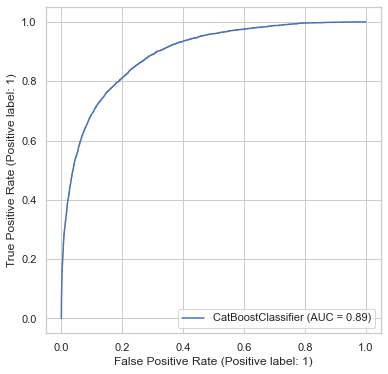

In [95]:
plt.rcParams["figure.figsize"] = (6,6)
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

The above <u>ROC curve</u> shows performance of the CatBoost Classifier as it serves as a probability curve.<br>
The label indicates the <u>Area under Curve</u> and has a high value of 0.89. Higher the area under is the curve, better is the prediction made by the classifier.

<font size="3">**(b) Random Forest**</font>

In [96]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

Here, we use <u>Random Forest Classifier</u> to train our model. It uses a number of decision tree classifiers on several sub samples of dataset and uses average.

In [97]:
y_pred1 = rf.predict(X_test)
print('Confusion Matrix: -')
print(confusion_matrix(y_test,y_pred1))
print('Accuracy score: -')
print(accuracy_score(y_test,y_pred1))
print('Classification report: -')
print(classification_report(y_test,y_pred1))

Confusion Matrix: -
[[20633  2084]
 [ 2457  3918]]
Accuracy score: -
0.8439089784133095
Classification report: -
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22717
           1       0.65      0.61      0.63      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.77     29092
weighted avg       0.84      0.84      0.84     29092



The report displays the quality of prediction made by Random Forest Classifier.

0.7614253849798933

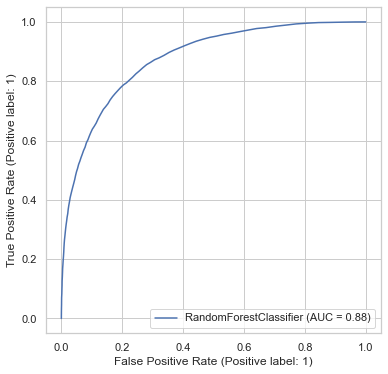

In [98]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)

It follows up that the area under the ROC curve of the prediction made by the Random Forest Classifier is 0.88.

<font size="3">**(c) Logistic Regression**</font>

In [99]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic Regression is used to train the model. It uses a logistic function to model binary dependent variables.

In [100]:
y_pred2 = logreg.predict(X_test)
print('Confusion Matrix: -')
print(confusion_matrix(y_test,y_pred2))
print('Accuracy score: -')
print(accuracy_score(y_test,y_pred2))
print('Classification report: -')
print(classification_report(y_test,y_pred2))

Confusion Matrix: -
[[17626  5091]
 [ 1514  4861]]
Accuracy score: -
0.7729616389385398
Classification report: -
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     22717
           1       0.49      0.76      0.60      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.83      0.77      0.79     29092



Here is the information about the prediction made by using Logistic Regression.

0.7692022541639801

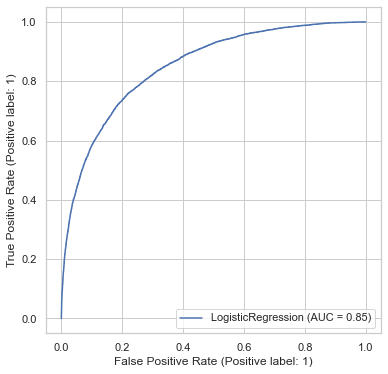

In [101]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)

It is noted that the area under ROC curve is 0.85.

Out of the three models used, CatBoost classifier gives the best prediction result. 

In [92]:
joblib.dump(rf, "rf.pkl")
joblib.dump(cat, "cat.pkl")
joblib.dump(logreg, "logreg.pkl")

['logreg.pkl']